# **CUSTOMER CHURN PREDICTION**
At Sunbase, we prioritize understanding our customers and ensuring their satisfaction. To achieve this,
we want to develop a machine learning model that predicts customer churn. Your task as a Machine
Learning Intern is to work on this project, following the guidelines and responsibilities outlined in the job
description.


# **PROBLEM STATEMENT**




*  Develop a machine learning model to predict customer churn based on historical customer data.
*  You will follow a typical machine learning project pipeline, from data preprocessing to model deployment.









# **BUSINESS CONTEXT**



Customer churn, also known as customer attrition, is a critical concern for businesses across various industries. It refers to the phenomenon where customers discontinue their usage of a product or service offered by a company. In the context of our business, Sunbase, understanding and mitigating customer churn is of utmost importance to ensure the sustainability and growth of our enterprise.


A successful customer churn prediction model can have several positive impacts on our business:

*  **Improved Customer Retention**: By identifying customers at risk of churning, we can implement retention strategies tailored to their needs, thereby reducing the churn rate.

*  **Cost Savings**: Lower churn rates lead to cost savings in terms of customer acquisition and onboarding expenses.

* **Enhanced Customer Satisfaction**: Proactive engagement and personalized offers can enhance the overall customer experience, increasing satisfaction and loyalty.

*  **Revenue Growth**: Retaining customers who might have otherwise churned contributes to revenue growth and long-term profitability.





# <b>DATA UNDERSTANDING</b>



Our Data set has 100000 obervasations and , 9 columns/features.

This dataset contains information about customers and their attributes, as well as their churn status (whether they've discontinued the service or not). Let's briefly explain each column:

*  **CustomerID**: A unique identifier for each customer.

*  **Name**: The name or identifier of the customer.

*  **Age**: The age of the customer.

*  **Gender**: The gender of the customer (Male/Female).

*  **Location**: The location where the customer is based (e.g., Los Angeles, New York, Miami).

*  **Subscription_Length_Months**: The duration of the customer's subscription in months.

*  **Monthly_Bill**: The amount billed to the customer on a monthly basis.

*  **Total_Usage_GB**: The total data usage in gigabytes (GB) by the customer.

*  Churn: This is the target variable, which indicates whether the customer has churned (1) or not (0).

      *  Churn = 1 implies that the customer has discontinued the service.
      *  Churn = 0 implies that the customer is still using the service.

# **DATASET LOADING AND OVERVIEW**

## Importing Libraries and Modules.

In [1]:
import pandas as pd
from sklearn.svm import SVC
import numpy as np
from numpy import math

import random

from sklearn.metrics import f1_score

import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

# !pip install matplotlib --upgrade

import seaborn as sns

from sklearn.ensemble import GradientBoostingClassifier

from datetime import datetime
import datetime as dt

from sklearn.preprocessing import MinMaxScaler, OneHotEncoder, MultiLabelBinarizer, StandardScaler, PolynomialFeatures, LabelEncoder

from sklearn.linear_model import LinearRegression, Lasso, Ridge, ElasticNet, LogisticRegression

from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn import tree
from IPython.display import SVG
from graphviz import Source
from IPython.display import display


from sklearn.tree import DecisionTreeRegressor

from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor

from sklearn.model_selection import cross_validate, train_test_split, GridSearchCV, cross_val_score, RepeatedStratifiedKFold, RandomizedSearchCV, cross_validate

from sklearn.feature_selection import chi2

from sklearn import metrics

from sklearn.ensemble import RandomForestClassifier

from sklearn.metrics import (
    r2_score,
    log_loss,
    mean_squared_error,
    accuracy_score,
    mean_absolute_error,
    roc_auc_score,
    ConfusionMatrixDisplay,
    classification_report,
    PrecisionRecallDisplay,
    RocCurveDisplay,
    recall_score,
    precision_score,
    roc_curve,
    auc,
    confusion_matrix
)

# from sklearn.metrics import ConfusionMatrixDisplay

from sklearn.pipeline import make_pipeline

from scipy.stats import skew

from imblearn.under_sampling import RandomUnderSampler

from sklearn.decomposition import PCA

from sklearn.neighbors import KNeighborsClassifier

from sklearn.naive_bayes import GaussianNB

import xgboost as xgb

from sklearn import tree, ensemble

from imblearn.combine import SMOTETomek
from imblearn.over_sampling import SMOTE

import warnings
warnings.filterwarnings('ignore')

# !pip install shap

pd.options.mode.chained_assignment = None  # default='warn'

from patsy import dmatrices
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

import pickle

import shap

from sklearn.model_selection import train_test_split

from tensorflow.keras import layers
from tensorflow.keras import regularizers

from tensorflow.keras.layers import Dense, Input

from tensorflow.keras.models import Sequential

from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import BinaryCrossentropy

from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping, TensorBoard

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score


print('matplotlib: {}'.format(matplotlib.__version__))



matplotlib: 3.7.2


## Dataset Loading

In [ ]:
# Adding Data set throught link.
url = "https://drive.google.com/file/d/1zGMX9kZQRon3MA3FUMS9PvwNuBEaRbgh/view?usp=drive_link"
url='https://drive.google.com/uc?id=' + url.split('/')[-2]

# Naming our dataset
df =  pd.read_csv(url,  encoding= 'unicode_escape')


In [ ]:
# Creating a copy, for working on it without harming the orignal dataset.
cc_df = df.copy()


## Data Overview

In [ ]:
# checking top 5 Rows or instances.
cc_df.head()

,CustomerID,Name,Age,Gender,Location,Subscription_Length_Months,Monthly_Bill,Total_Usage_GB,Churn
0,1,Customer_1,63,Male,Los Angeles,17,73.36,236,0
1,2,Customer_2,62,Female,New York,1,48.76,172,0
2,3,Customer_3,24,Female,Los Angeles,5,85.47,460,0
3,4,Customer_4,36,Female,Miami,3,97.94,297,1
4,5,Customer_5,46,Female,Miami,19,58.14,266,0


In [ ]:
# checking last 5 Rows or instances.
cc_df.tail()

,CustomerID,Name,Age,Gender,Location,Subscription_Length_Months,Monthly_Bill,Total_Usage_GB,Churn
99995,99996,Customer_99996,33,Male,Houston,23,55.13,226,1
99996,99997,Customer_99997,62,Female,New York,19,61.65,351,0
99997,99998,Customer_99998,64,Male,Chicago,17,96.11,251,1
99998,99999,Customer_99999,51,Female,New York,20,49.25,434,1
99999,100000,Customer_100000,27,Female,Los Angeles,19,76.57,173,1


In [ ]:
# checking total rows and columns ( Rows, Columns).
cc_df.shape

(100000, 9)

Some insights:-
1.  

In [ ]:
# checking basic information of all columns such as datatype, total number null values present, memory usage etc.
cc_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 9 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   CustomerID                  100000 non-null  int64  
 1   Name                        100000 non-null  object 
 2   Age                         100000 non-null  int64  
 3   Gender                      100000 non-null  object 
 4   Location                    100000 non-null  object 
 5   Subscription_Length_Months  100000 non-null  int64  
 6   Monthly_Bill                100000 non-null  float64
 7   Total_Usage_GB              100000 non-null  int64  
 8   Churn                       100000 non-null  int64  
dtypes: float64(1), int64(5), object(3)
memory usage: 6.9+ MB


Some insights:-
1.

In [ ]:
# checking description of all data types columns.
cc_df.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
CustomerID,100000.0,NaN,NaN,NaN,50000.5,28867.657797,1.0,25000.75,50000.5,75000.25,100000.0
Name,100000,100000,Customer_1,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Age,100000.0,NaN,NaN,NaN,44.02702,15.280283,18.0,31.0,44.0,57.0,70.0
Gender,100000,2,Female,50216,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Location,100000,5,Houston,20157,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Subscription_Length_Months,100000.0,NaN,NaN,NaN,12.4901,6.926461,1.0,6.0,12.0,19.0,24.0
Monthly_Bill,100000.0,NaN,NaN,NaN,65.053197,20.230696,30.0,47.54,65.01,82.64,100.0
Total_Usage_GB,100000.0,NaN,NaN,NaN,274.39365,130.463063,50.0,161.0,274.0,387.0,500.0
Churn,100000.0,NaN,NaN,NaN,0.49779,0.499998,0.0,0.0,0.0,1.0,1.0


In [ ]:
# Checking for unique values in each column
cc_df.nunique()

CustomerID                    100000
Name                          100000
Age                               53
Gender                             2
Location                           5
Subscription_Length_Months        24
Monthly_Bill                    7001
Total_Usage_GB                   451
Churn                              2
dtype: int64

In [ ]:
# columns in our dataset
df.columns

Index(['CustomerID', 'Name', 'Age', 'Gender', 'Location',
       'Subscription_Length_Months', 'Monthly_Bill', 'Total_Usage_GB',
       'Churn'],
      dtype='object')

# **DATASET CLEANUP**

## Duplicate check

In [ ]:
# Checking for duplicate values
len(cc_df[cc_df.duplicated()])

0

## Null or missing values

### *Checking for null values*

In [ ]:
# Checking for null or missing values in every column
cc_df.isnull().sum()


CustomerID                    0
Name                          0
Age                           0
Gender                        0
Location                      0
Subscription_Length_Months    0
Monthly_Bill                  0
Total_Usage_GB                0
Churn                         0
dtype: int64

<Axes: >

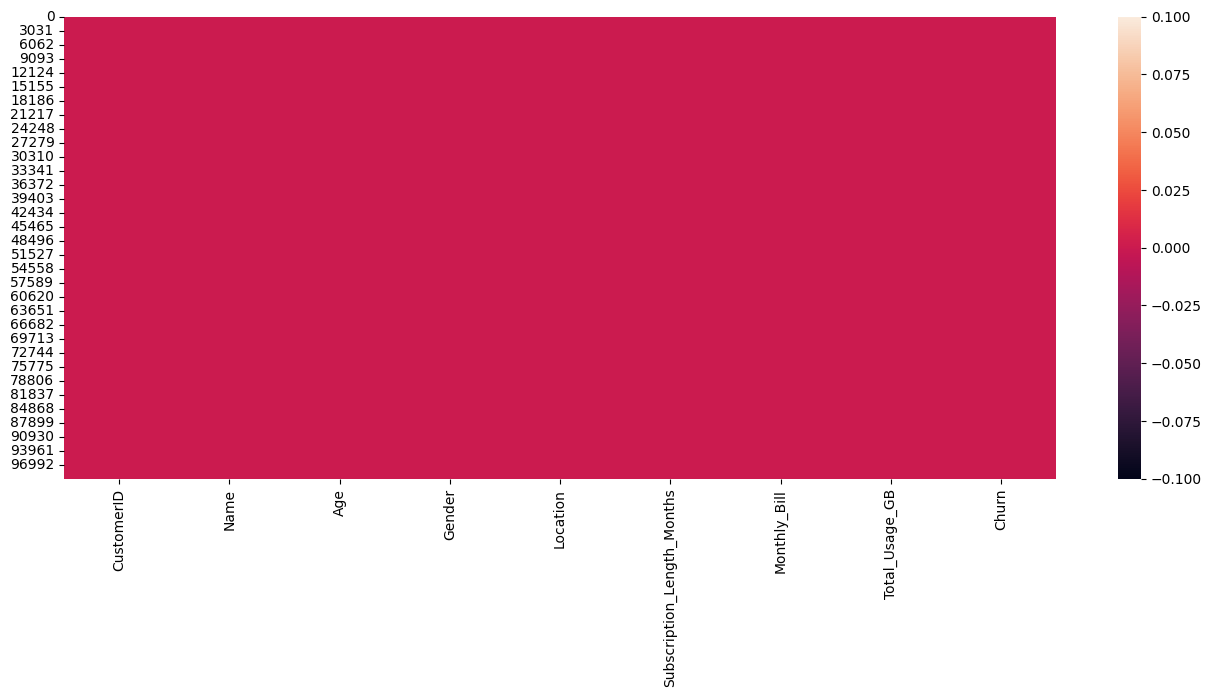

In [ ]:
# PLotting missing and null values in a heatmap
plt.figure(figsize=(16,6))
sns.heatmap(cc_df.isnull())

In [ ]:
# Checking number of rows in which null values are present
count = 0
for i in cc_df.isna().sum(axis = 1) :
  if i>0 :
    count = count + 1
print('Total number of rows with missing values is ', count)

Total number of rows with missing values is  0


In [ ]:
# Percentage of null values in the respective columns
(cc_df.isnull().sum()/cc_df.shape[0]*100).sort_values(ascending=False)

CustomerID                    0.0
Name                          0.0
Age                           0.0
Gender                        0.0
Location                      0.0
Subscription_Length_Months    0.0
Monthly_Bill                  0.0
Total_Usage_GB                0.0
Churn                         0.0
dtype: float64

### *Dealing will null values*

Explaination:-
* As the data is missing and replacing it with mean, median or mode will make the dataset biased, and in case of medical data we cant take risk, so to avoid any such biasness in model learning we will delete those observations.We also havent got any prior request from the business regarding the handling of null values.

* We cant take risk as replacing such value may affect the number of false positives and false negatives.


In [ ]:
cc_df.shape

(100000, 9)

In [ ]:
# Deleting null values observations
cc_df.dropna(how = "any", inplace= True)

# Resetting index
cc_df.reset_index(inplace = True, drop = True)

# Shape of the dataset now
cc_df.shape



(100000, 9)

In [ ]:
# Re-Check for null values in the new dataset
cc_df.isnull().sum()

CustomerID                    0
Name                          0
Age                           0
Gender                        0
Location                      0
Subscription_Length_Months    0
Monthly_Bill                  0
Total_Usage_GB                0
Churn                         0
dtype: int64

## Dropping unnecessary features

In [ ]:
#Dropping 'id' feature
cc_df.drop('CustomerID',axis=1,inplace=True)
cc_df.drop('Name',axis=1,inplace=True)

# #Dropping 'education' feature
# cc_df.drop("education",axis=1,inplace=True)


Explaination:-
*  Since CustomerID and Name has no effect on target variable so we will drop this column from our dataset.



In [ ]:
cc_df.head()

,Age,Gender,Location,Subscription_Length_Months,Monthly_Bill,Total_Usage_GB,Churn
0,63,Male,Los Angeles,17,73.36,236,0
1,62,Female,New York,1,48.76,172,0
2,24,Female,Los Angeles,5,85.47,460,0
3,36,Female,Miami,3,97.94,297,1
4,46,Female,Miami,19,58.14,266,0


## Dividing into categorical and numerical features.

In [ ]:
# Printing a table which tells the number of unique value in a column
counting= []
for column in cc_df.columns:
  counting.append(cc_df[column].nunique())

counts=pd.DataFrame({'columns' :cc_df.columns,
                    'Unique values' :[i for i in counting]
                      })
counts

,columns,Unique values
0,Age,53
1,Gender,2
2,Location,5
3,Subscription_Length_Months,24
4,Monthly_Bill,7001
5,Total_Usage_GB,451
6,Churn,2


## Encoding column Gender and Location

In [ ]:
# # Define a label encoding dictionary for the 'Gender' column
# label_encoding = {'Gender': {'Male': 0, 'Female': 1}}

# # Apply the label encoding to the 'Gender' column in the DataFrame
# cc_df = cc_df.replace(label_encoding)


# 'Location' is the column containing city names in cc_df
cc_df_copy = pd.get_dummies(cc_df, columns=['Gender'], prefix='Gender')

# Display the encoded DataFrame
cc_df_copy.head()


,Age,Location,Subscription_Length_Months,Monthly_Bill,Total_Usage_GB,Churn,Gender_Female,Gender_Male
0,63,Los Angeles,17,73.36,236,0,0,1
1,62,New York,1,48.76,172,0,1,0
2,24,Los Angeles,5,85.47,460,0,1,0
3,36,Miami,3,97.94,297,1,1,0
4,46,Miami,19,58.14,266,0,1,0


In [ ]:
# 'Location' is the column containing city names in cc_df
cc_df_copy = pd.get_dummies(cc_df_copy, columns=['Location'], prefix='Location')

# Display the encoded DataFrame
cc_df_copy.head()

,Age,Subscription_Length_Months,Monthly_Bill,Total_Usage_GB,Churn,Gender_Female,Gender_Male,Location_Chicago,Location_Houston,Location_Los Angeles,Location_Miami,Location_New York
0,63,17,73.36,236,0,0,1,0,0,1,0,0
1,62,1,48.76,172,0,1,0,0,0,0,0,1
2,24,5,85.47,460,0,1,0,0,0,1,0,0
3,36,3,97.94,297,1,1,0,0,0,0,1,0
4,46,19,58.14,266,0,1,0,0,0,0,1,0


In [ ]:
cc_df_copy.shape

(100000, 12)

## Creating New Features


### Age group by range

In [ ]:
# Find the minimum and maximum values in the 'Age' column
min_age = cc_df['Age'].min()
max_age = cc_df['Age'].max()

# Print the minimum and maximum values
print(f"Minimum Age: {min_age}")
print(f"Maximum Age: {max_age}")


Minimum Age: 18
Maximum Age: 70


In [ ]:
# Define age ranges and corresponding labels
age_ranges = [(0, 20), (21, 30), (31, 40), (41, 50), (51, 60), (61, 200)]
age_labels = ["Age_0_20", "Age_21_30", "Age_31_40", "Age_41_50", "Age_51_60", "Age_61_200"]

# Iterate through each age range and create a new column for it
for age_range, age_label in zip(age_ranges, age_labels):
    cc_df_copy[age_label] = ((cc_df_copy['Age'] >= age_range[0]) & (cc_df_copy['Age'] <= age_range[1])).astype(int)


### Short term and Long term Subscriptions

In [ ]:
# Threshold to distinguish short-term and long-term subscriptions
subscription_length_threshold = 12  # Example: 12 months as the threshold

# Create a new feature 'Subscription_Category' based on the threshold
cc_df_copy['Subscription_Category'] = cc_df_copy['Subscription_Length_Months'].apply(
    lambda x: 'Short-Term' if x <= subscription_length_threshold else 'Long-Term'
)


# # Define a label encoding dictionary for the 'Subscription_Category' column
# label_encoding = {'Subscription_Category': {'Short-Term': 0, 'Long-Term': 1}}

# # Apply the label encoding to the 'Subscription_Category' column in the DataFrame
# cc_df_copy = cc_df_copy.replace(label_encoding)


# 'Location' is the column containing city names in cc_df
cc_df_copy = pd.get_dummies(cc_df_copy, columns=['Subscription_Category'], prefix='Subscription_Category')

# Display the encoded DataFrame
cc_df_copy.head()




,Age,Subscription_Length_Months,Monthly_Bill,Total_Usage_GB,Churn,Gender_Female,Gender_Male,Location_Chicago,Location_Houston,Location_Los Angeles,Location_Miami,Location_New York,Age_0_20,Age_21_30,Age_31_40,Age_41_50,Age_51_60,Age_61_200,Subscription_Category_Long-Term,Subscription_Category_Short-Term
0,63,17,73.36,236,0,0,1,0,0,1,0,0,0,0,0,0,0,1,1,0
1,62,1,48.76,172,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,1
2,24,5,85.47,460,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,1
3,36,3,97.94,297,1,1,0,0,0,0,1,0,0,0,1,0,0,0,0,1
4,46,19,58.14,266,0,1,0,0,0,0,1,0,0,0,0,1,0,0,1,0


### Billing to Usage Ratio

In [ ]:
# Create a new feature 'Billing_to_Usage_Ratio'
cc_df_copy['Billing_to_Usage_Ratio'] = cc_df_copy['Monthly_Bill'] / cc_df_copy['Total_Usage_GB']

### Total amount paid till now

In [ ]:
# Create a new feature 'Total_Paid'
cc_df_copy['Total_Paid'] = cc_df_copy['Subscription_Length_Months'] * cc_df_copy['Monthly_Bill']



### Per GB prie for each customer

In [ ]:
# Create a new feature 'Per_GB_Price' by dividing 'Monthly_Bill' by 'Total_Usage_GB'
cc_df_copy['Per_GB_Price'] = cc_df_copy['Monthly_Bill'] * cc_df_copy['Subscription_Length_Months'] / cc_df_copy['Total_Usage_GB']


In [ ]:
# Display the DataFrame with the new age group columns
cc_df_copy.head()

,Age,Subscription_Length_Months,Monthly_Bill,Total_Usage_GB,Churn,Gender_Female,Gender_Male,Location_Chicago,Location_Houston,Location_Los Angeles,...,Age_21_30,Age_31_40,Age_41_50,Age_51_60,Age_61_200,Subscription_Category_Long-Term,Subscription_Category_Short-Term,Billing_to_Usage_Ratio,Total_Paid,Per_GB_Price
0,63,17,73.36,236,0,0,1,0,0,1,...,0,0,0,0,1,1,0,0.310847,1247.12,5.284407
1,62,1,48.76,172,0,1,0,0,0,0,...,0,0,0,0,1,0,1,0.283488,48.76,0.283488
2,24,5,85.47,460,0,1,0,0,0,1,...,1,0,0,0,0,0,1,0.185804,427.35,0.929022
3,36,3,97.94,297,1,1,0,0,0,0,...,0,1,0,0,0,0,1,0.329764,293.82,0.989293
4,46,19,58.14,266,0,1,0,0,0,0,...,0,0,1,0,0,1,0,0.218571,1104.66,4.152857


## Creating List of Variable Types

In [ ]:
categorical_features= ['Gender_Male', 'Gender_Female', 'Location_Chicago',	'Location_Houston',	'Location_Los Angeles',	'Location_Miami',	'Location_New York', 'Age_0_20',	'Age_21_30',	'Age_31_40',	'Age_41_50',	'Age_51_60',	'Age_61_200', 'Subscription_Category_Short-Term', 'Subscription_Category_Long-Term']

numerical_features= ['Age', 'Subscription_Length_Months', 'Monthly_Bill', 'Total_Usage_GB', 'Billing_to_Usage_Ratio',	'Total_Paid',	'Per_GB_Price']

independent_features= ['Gender_Male', 'Gender_Female', 'Location_Chicago',	'Location_Houston',	'Location_Los Angeles',	'Location_Miami',	'Location_New York', 'Age_0_20',	'Age_21_30',	'Age_31_40',	'Age_41_50',	'Age_51_60',	'Age_61_200', 'Subscription_Category_Short-Term', 'Subscription_Category_Long-Term', 'Age', 'Subscription_Length_Months', 'Monthly_Bill', 'Total_Usage_GB', 'Billing_to_Usage_Ratio',	'Total_Paid',	'Per_GB_Price']

dependent_features=['Churn']

In [ ]:
cc_df_copy[independent_features]

,Gender_Male,Gender_Female,Location_Chicago,Location_Houston,Location_Los Angeles,Location_Miami,Location_New York,Age_0_20,Age_21_30,Age_31_40,...,Age_61_200,Subscription_Category_Short-Term,Subscription_Category_Long-Term,Age,Subscription_Length_Months,Monthly_Bill,Total_Usage_GB,Billing_to_Usage_Ratio,Total_Paid,Per_GB_Price
0,1,0,0,0,1,0,0,0,0,0,...,1,0,1,63,17,73.36,236,0.310847,1247.12,5.284407
1,0,1,0,0,0,0,1,0,0,0,...,1,1,0,62,1,48.76,172,0.283488,48.76,0.283488
2,0,1,0,0,1,0,0,0,1,0,...,0,1,0,24,5,85.47,460,0.185804,427.35,0.929022
3,0,1,0,0,0,1,0,0,0,1,...,0,1,0,36,3,97.94,297,0.329764,293.82,0.989293
4,0,1,0,0,0,1,0,0,0,0,...,0,0,1,46,19,58.14,266,0.218571,1104.66,4.152857
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,1,0,0,1,0,0,0,0,0,1,...,0,0,1,33,23,55.13,226,0.243938,1267.99,5.610575
99996,0,1,0,0,0,0,1,0,0,0,...,1,0,1,62,19,61.65,351,0.175641,1171.35,3.337179
99997,1,0,1,0,0,0,0,0,0,0,...,1,0,1,64,17,96.11,251,0.382908,1633.87,6.509442
99998,0,1,0,0,0,0,1,0,0,0,...,0,0,1,51,20,49.25,434,0.113479,985.00,2.269585


# **EDA**

## **UNIVARIATE ANALYSIS**

### Color Fucntions

In [ ]:
def clr():
  colors=['green', 'blue', 'purple','red', 'orange', 'maroon', 'yellow', ]
  clr= random.choice(colors)
  return clr

def clr_pal():
   clr_pal=random.choice([ "bright", "dark", "colorblind","rocket", "icefire","Spectral","coolwarm", "Paired", "Set2"])
   return clr_pal

### 1. Histogram for all columns

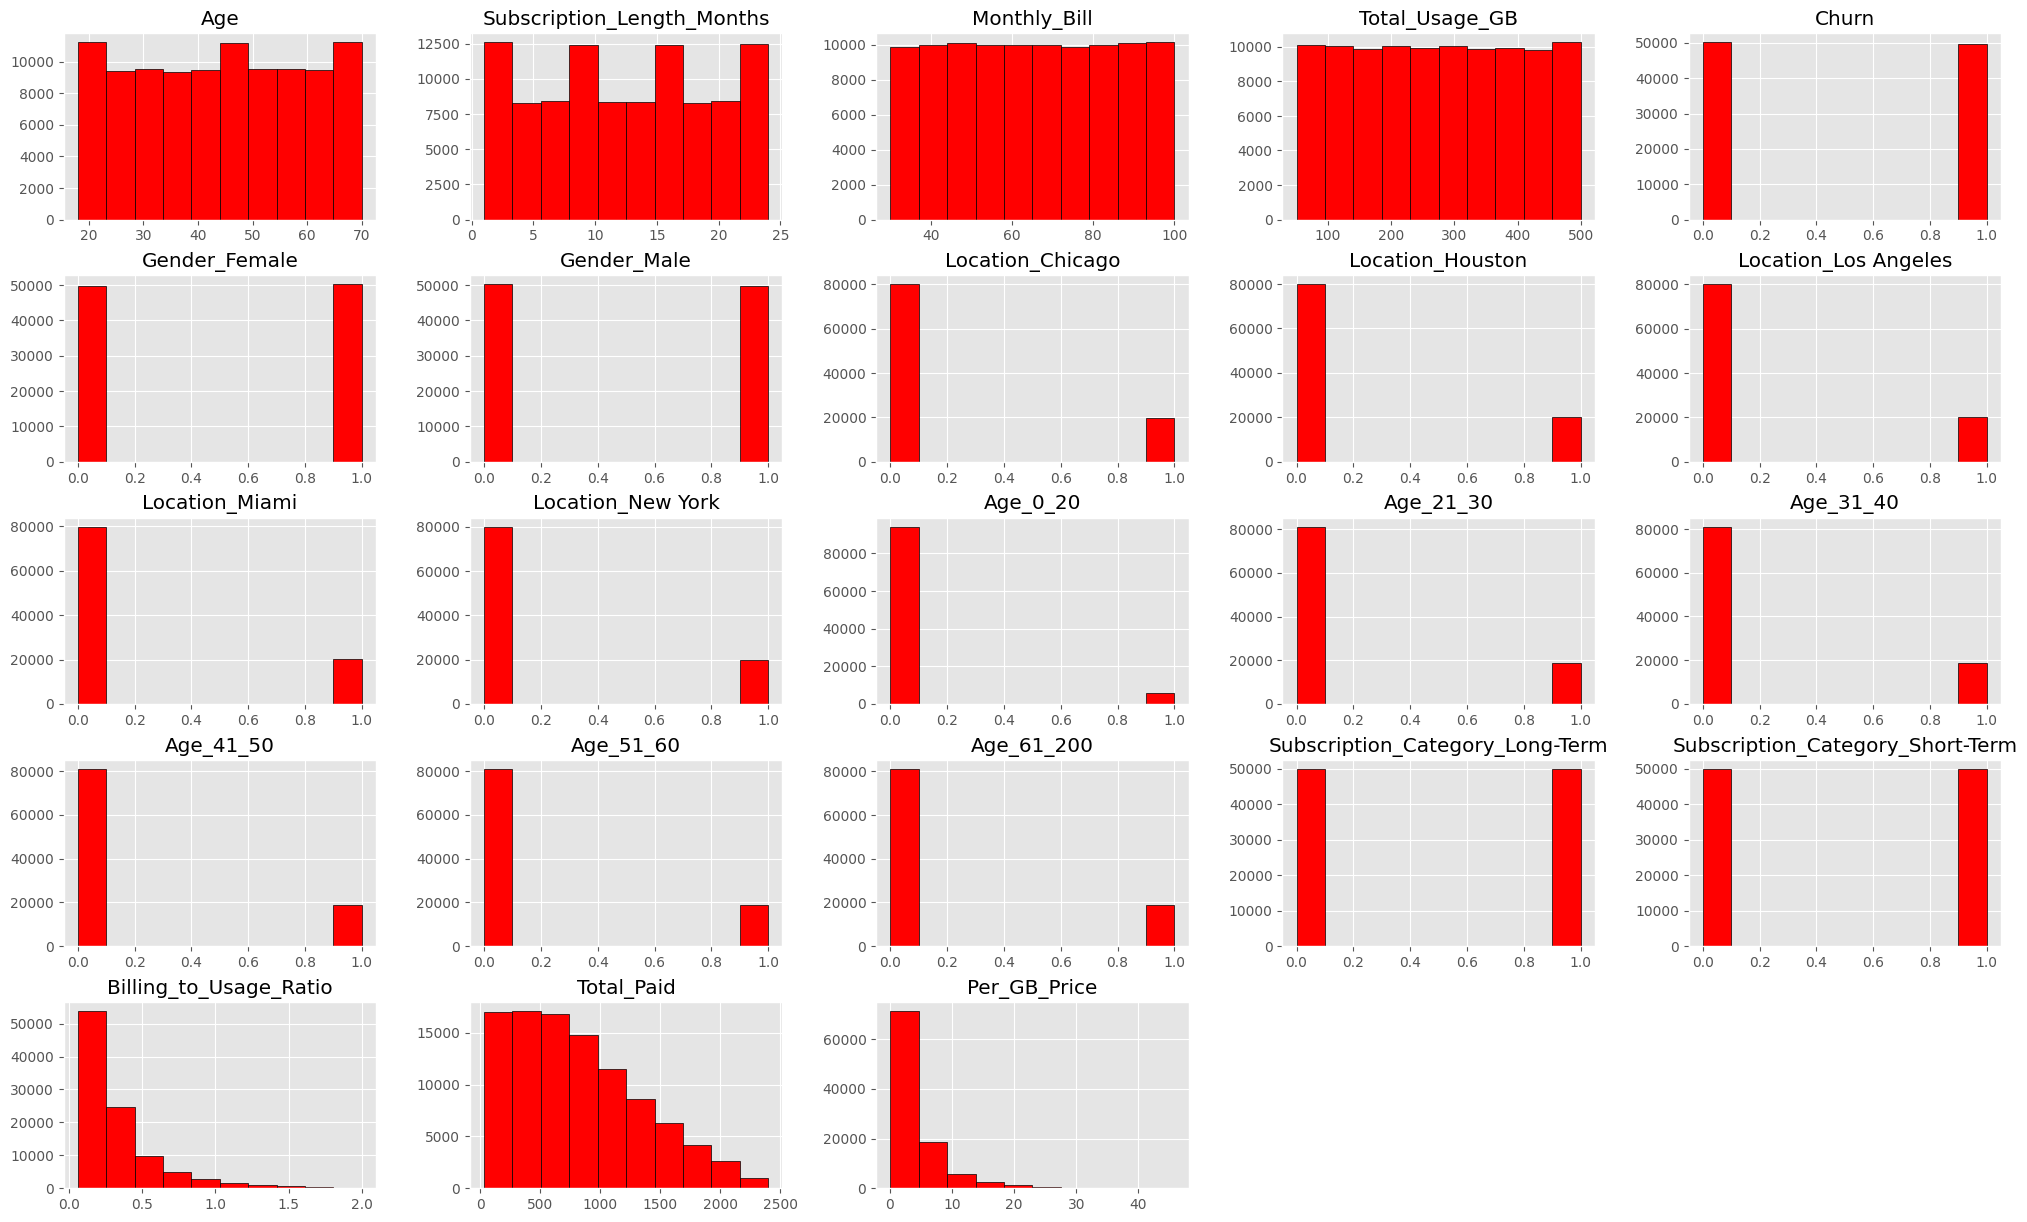

In [ ]:
# it shows the value distribution in each columns


plt.style.use('ggplot')
cc_df_copy.hist(figsize=(25,15),color = clr(), ec="black")
plt.show()

### 2. Correlation heatmap

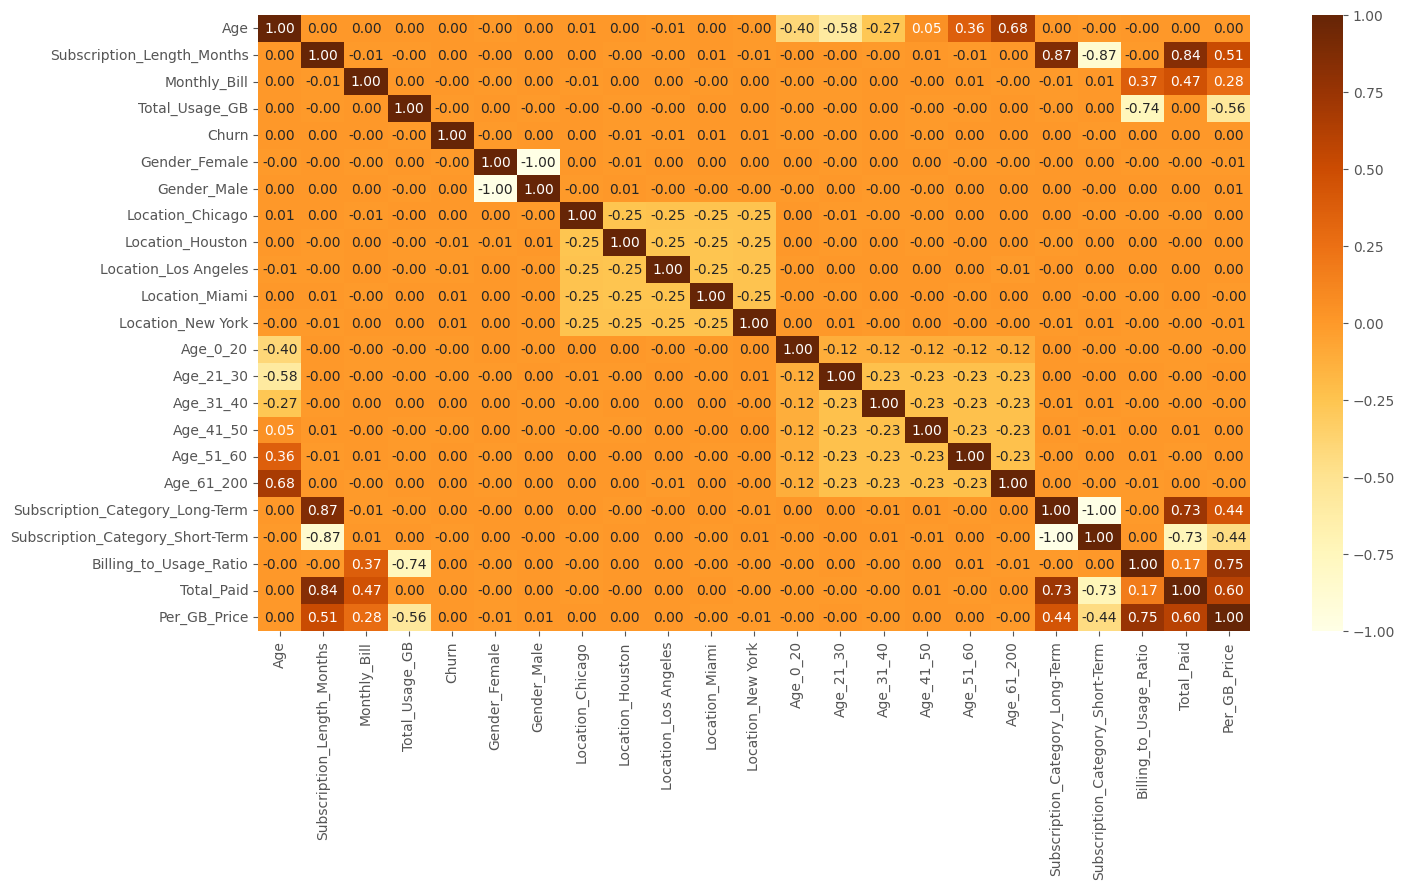

In [ ]:
# Printing correlation heatmap
plt.figure(figsize=(16, 8))
correlation_matrix = cc_df_copy.corr().round(3)
sns.heatmap(correlation_matrix, annot=True, cmap="YlOrBr", fmt=".2f")  # Specify fmt=".2f" for 2 decimal places
plt.show()

Explaination:-
1.




### 3. Age distribution

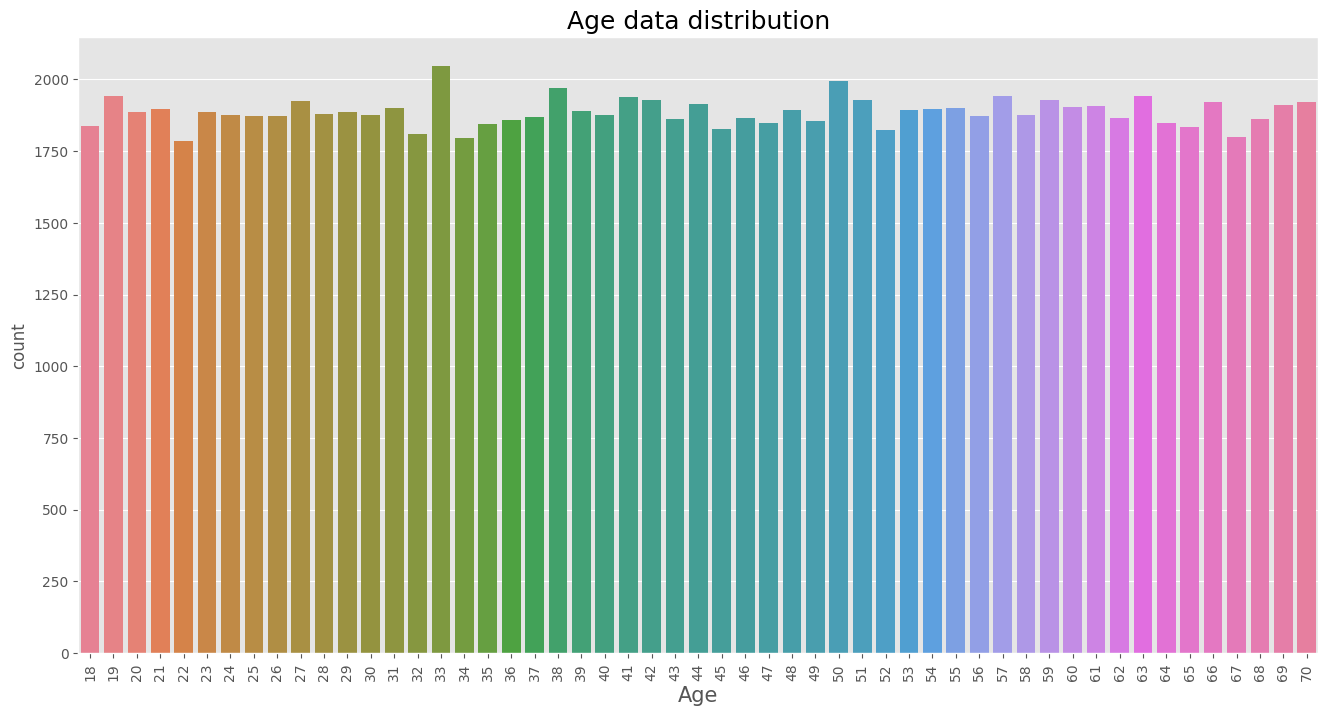

In [ ]:
# Distribution of Age
fig, ax = plt.subplots(figsize = (16,8))
sns.countplot(x= 'Age', data=cc_df_copy , palette='husl')
ax.set_xlabel( 'Age' , size = 15 )
ax.set_title( 'Age data distribution' , size = 18 )
plt.xticks(rotation=90);

Explaination:-
* We have most of the data of age between 38 to 46 years old people.
* Minimum data is available of age 32 to 34 and from 68 to 70.

### 4. Distribution of Churn

Text(0.5, 1.0, 'Distribution of Churn')

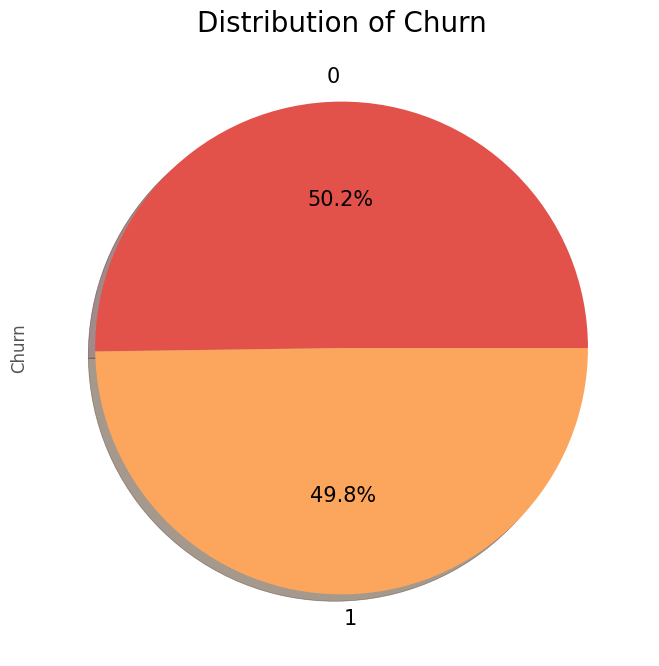

In [ ]:
# Distribution of Churn
plt.figure(figsize=(16,8))
palette_color = sns.color_palette(clr_pal())
cc_df_copy['Churn'].value_counts().plot(kind='pie',colors= palette_color , autopct='%1.1f%%' , fontsize=15 , shadow=True)
plt.title('Distribution of Churn', fontsize=20)

Explaination:-
* We have more data of females as compared to males.

### 5. Distribution of Location

Text(0.5, 1.0, 'Location data distribution')

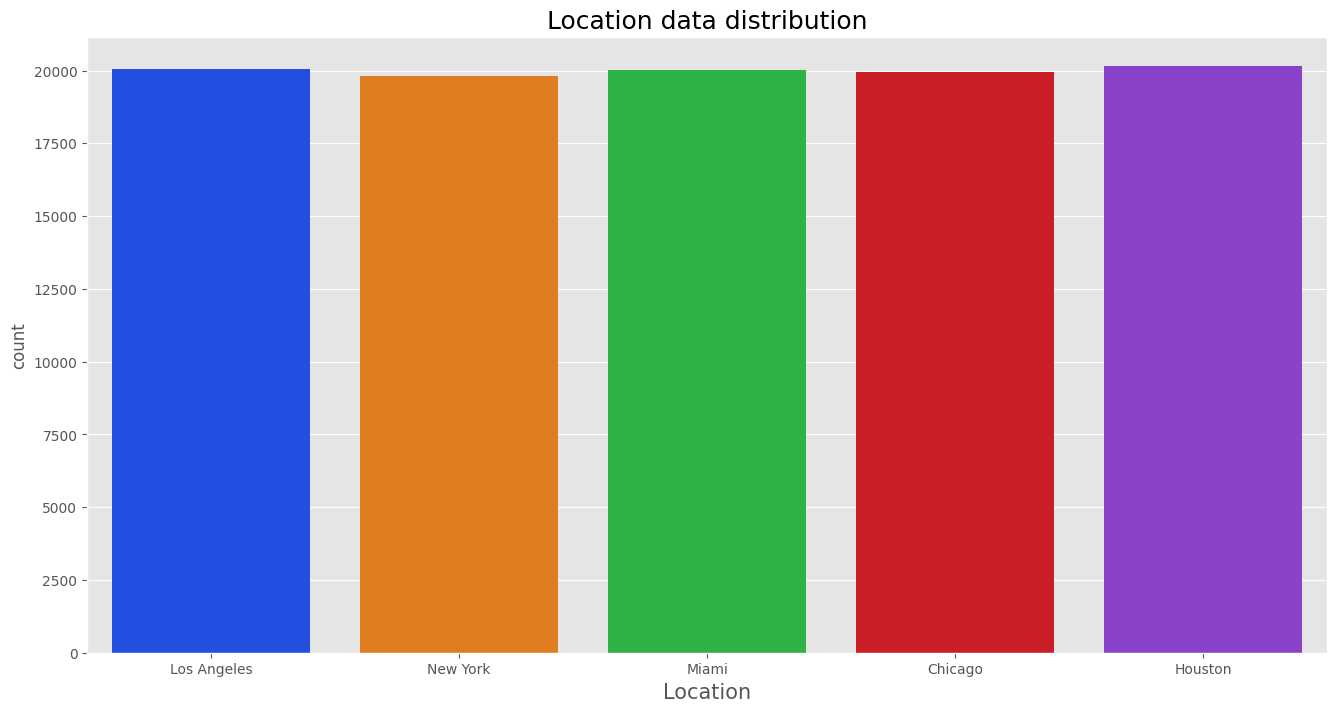

In [ ]:
# Distribution of Location
fig, ax = plt.subplots(figsize = (16,8))
sns.countplot(x= 'Location', data=cc_df , palette='bright')
ax.set_xlabel( 'Location' , size = 15 )
ax.set_title( 'Location data distribution' , size = 18 )

Explaination:-
* We have less smokes in out provided dataset.


### 6. Distribution of Gender

Text(0.5, 1.0, 'Distribution of Gender')

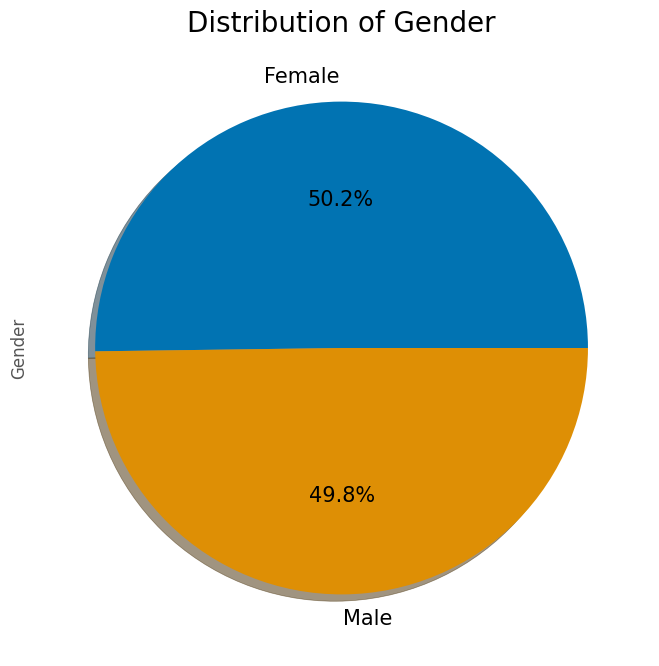

In [ ]:
# Distribution of Gender
plt.figure(figsize=(16,8))
palette_color = sns.color_palette(clr_pal())
df['Gender'].value_counts().plot(kind='pie',colors=palette_color , autopct='%1.1f%%' , fontsize=15 , shadow=True)
plt.title('Distribution of Gender', fontsize=20)

Explaination:-
* In our dataset the dependent variable, the class-1 we are going to predict is 15.2% of the total observations.

### 7. Distribution of Total_Usage_GB

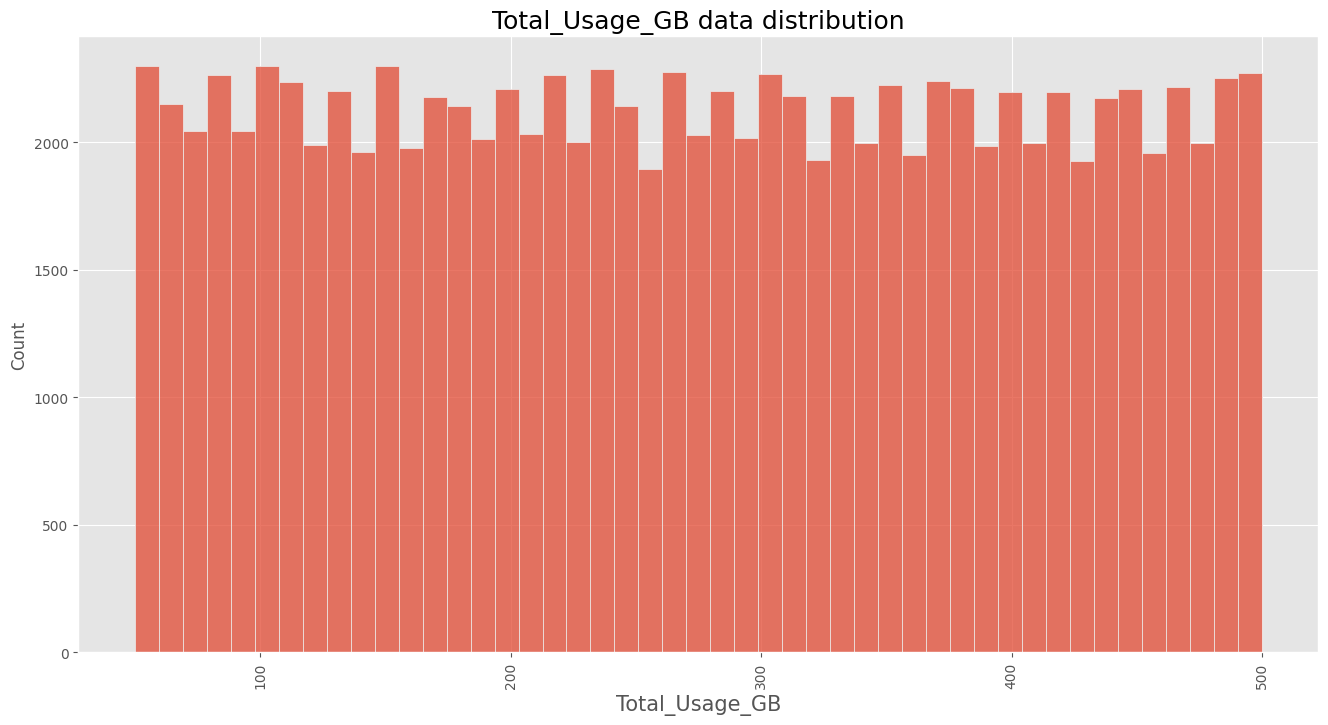

In [ ]:
# Distribution of Total_Usage_GB
plt.figure(figsize = (16,8))
sns.histplot(x= 'Total_Usage_GB', data=cc_df_copy , palette='husl')
plt.xlabel( 'Total_Usage_GB' , size = 15 )
plt.title( 'Total_Usage_GB data distribution' , size = 18 )
plt.xticks(rotation=90);

Explaination:-
* We have very less diabetic patients in the dataset as compared to non-diabetic paitents.

## **BIVARIATE ANALYSIS**

### 1. Churn vs Age

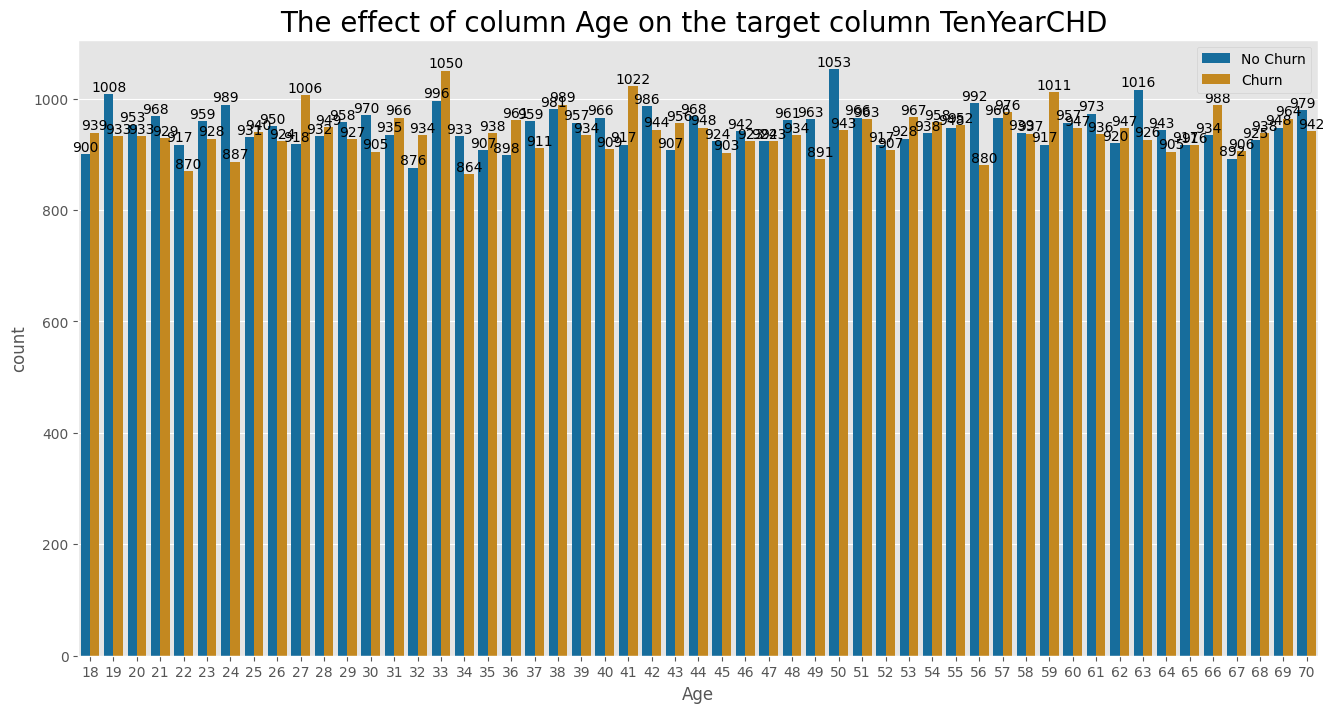

In [ ]:
plt.figure(figsize=(16,8))
ax = sns.countplot( x= 'Age'  , hue='Churn' ,data= cc_df,  palette=(str(clr_pal())) )
for i in ax.containers:
  ax.bar_label(i,)
plt.title('The effect of column Age on the target column TenYearCHD ',size=20)
plt.legend(['No Churn','Churn'])

ticks_lst=[]
if len(ticks_lst) != 0:
  ax.set(xticklabels = (ticks_lst))

plt.show()

### 2. Churn vs Gender

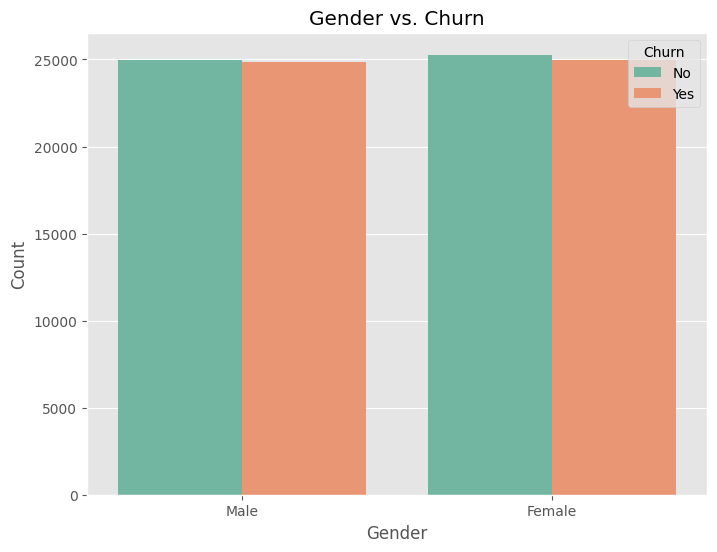

In [ ]:
# Count plot for Gender vs. Churn
plt.figure(figsize=(8, 6))
sns.countplot(x="Gender", hue="Churn", data=cc_df, palette="Set2")
plt.xlabel("Gender")
plt.ylabel("Count")
plt.title("Gender vs. Churn")
plt.legend(title="Churn", loc="upper right", labels=["No", "Yes"])
plt.show()


### 3. Churn vs Location

<Figure size 1200x600 with 0 Axes>

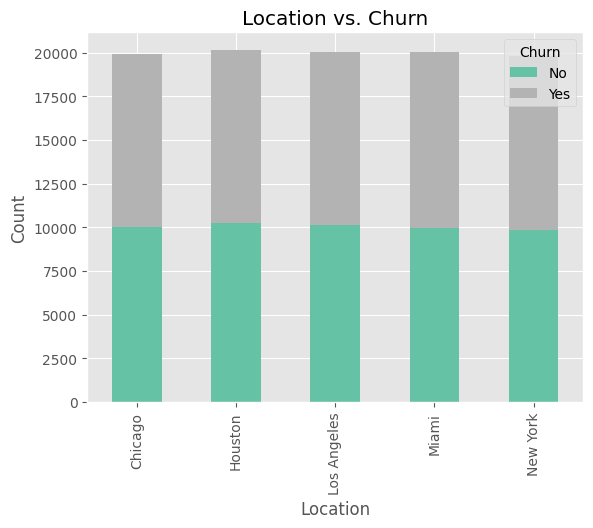

In [ ]:
plt.figure(figsize=(12, 6))
location_churn = cc_df.groupby(["Location", "Churn"]).size().unstack()
location_churn.plot(kind="bar", stacked=True, colormap="Set2")
plt.xlabel("Location")
plt.ylabel("Count")
plt.title("Location vs. Churn")
plt.legend(title="Churn", loc="upper right", labels=["No", "Yes"])
plt.show()


### 4. Total Usage GB vs. Monthly Bill

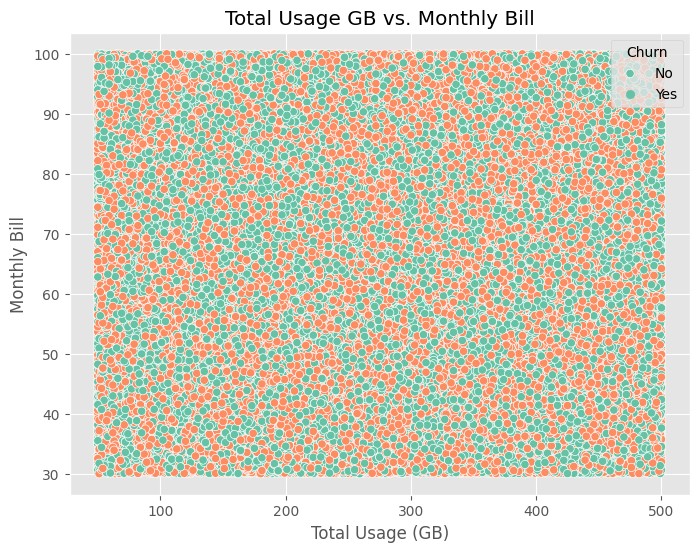

In [ ]:
plt.figure(figsize=(8, 6))
sns.scatterplot(data=cc_df, x="Total_Usage_GB", y="Monthly_Bill", hue="Churn", palette="Set2")
plt.xlabel("Total Usage (GB)")
plt.ylabel("Monthly Bill")
plt.title("Total Usage GB vs. Monthly Bill")
plt.legend(title="Churn", loc="upper right", labels=["No", "Yes"])
plt.show()


## **MULTIVARIATE ANALYSIS**

### 1.  Age, Monthly Bill, and Total Usage GB

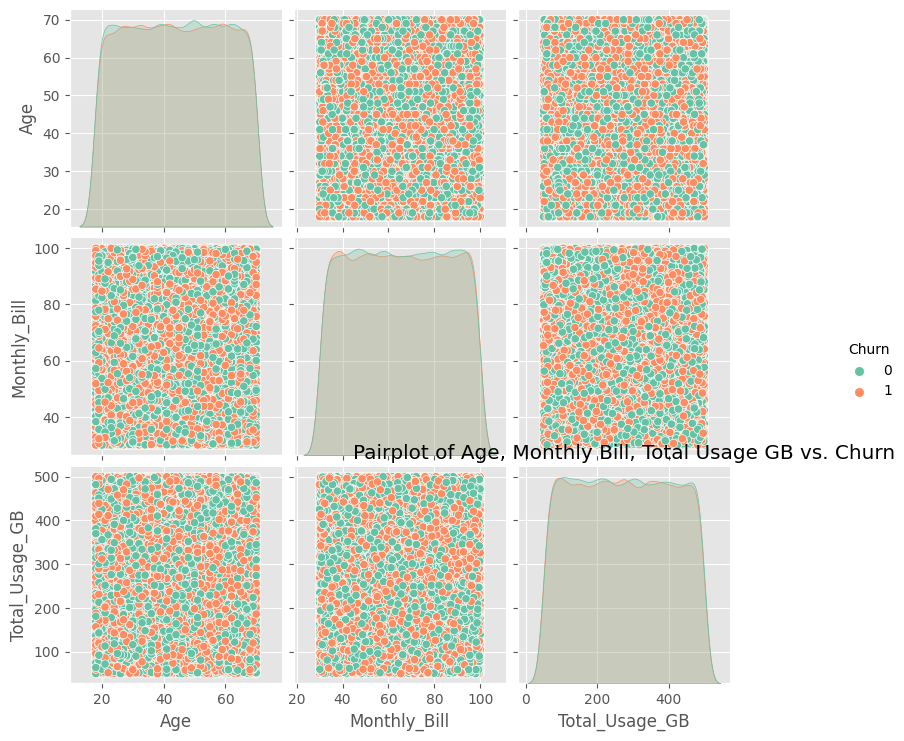

In [ ]:
# Subset the dataset for relevant columns
subset_df = cc_df[["Age", "Monthly_Bill", "Total_Usage_GB", "Churn"]]


sns.pairplot(data=subset_df, hue="Churn", palette="Set2")
plt.title("Pairplot of Age, Monthly Bill, Total Usage GB vs. Churn")
plt.show()


### 2. Monthly Bill by Location and Gender

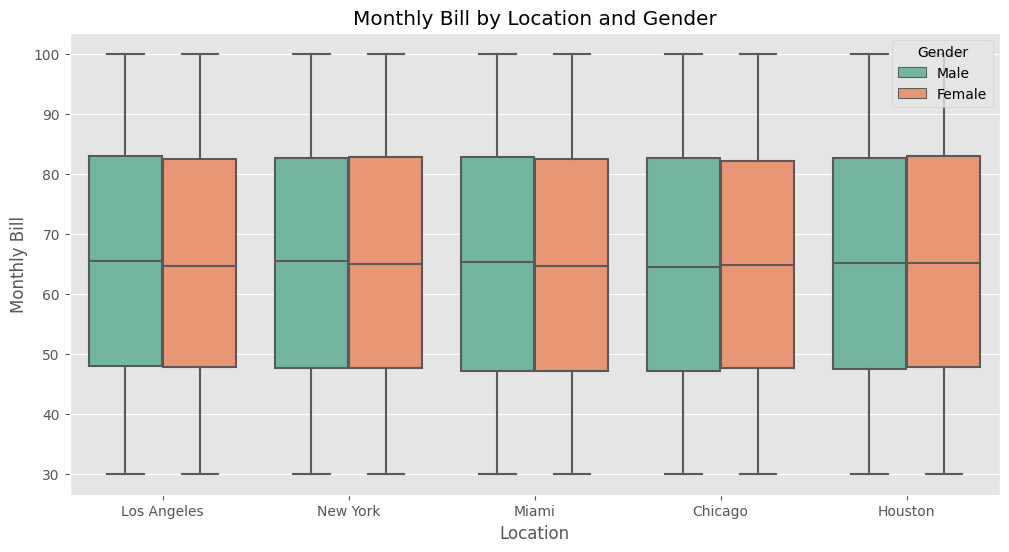

In [ ]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=cc_df, x="Location", y="Monthly_Bill", hue="Gender", palette="Set2")
plt.xlabel("Location")
plt.ylabel("Monthly Bill")
plt.title("Monthly Bill by Location and Gender")
plt.legend(title="Gender", loc="upper right")
plt.show()


# **FEATURE ENGINEERING**

## 1. Hypothesis Testing



To check whether discrete variables are related, chi2 test can be used. We define:
1. **Null Hypothesis (H0): Two variables are independent.**
2. **Alternate Hypothesis (H1): Two variables are not independent.**

We can use Chi2 test to get a p-value and check if a categorical variable is dependent or independent to the dependent variable. If the p value obtained is greater than 0.05 then we reject the null hypothesis, and accept the alternate hypothesis.

In [ ]:
# chi2 scores
chi_scores = chi2(cc_df_copy[categorical_features],cc_df_copy[dependent_features])
chi_scores

(array([2.25892277e-01, 2.23948963e-01, 2.04744129e-02, 3.61416404e+00,
        1.84749814e+00, 2.19193353e+00, 2.73009999e+00, 1.69133426e-01,
        1.10697360e+00, 9.15009930e-01, 2.91762812e-01, 6.83194047e-01,
        9.20812105e-04, 1.76300569e-01, 1.76448723e-01]),
 array([0.63458651, 0.63604734, 0.88622003, 0.05728951, 0.17407466,
        0.13873506, 0.09847312, 0.68088311, 0.29274077, 0.33878862,
        0.58909309, 0.40848903, 0.975792  , 0.67457194, 0.67444308]))

In [ ]:
# P values for discrete features
p_values = pd.Series(chi_scores[1],index = cc_df_copy[categorical_features].columns)
p_values.sort_values(ascending = False , inplace = True)
p_values

Age_61_200                          0.975792
Location_Chicago                    0.886220
Age_0_20                            0.680883
Subscription_Category_Short-Term    0.674572
Subscription_Category_Long-Term     0.674443
Gender_Female                       0.636047
Gender_Male                         0.634587
Age_41_50                           0.589093
Age_51_60                           0.408489
Age_31_40                           0.338789
Age_21_30                           0.292741
Location_Los Angeles                0.174075
Location_Miami                      0.138735
Location_New York                   0.098473
Location_Houston                    0.057290
dtype: float64

<Axes: title={'center': 'P-value for discrete features'}>

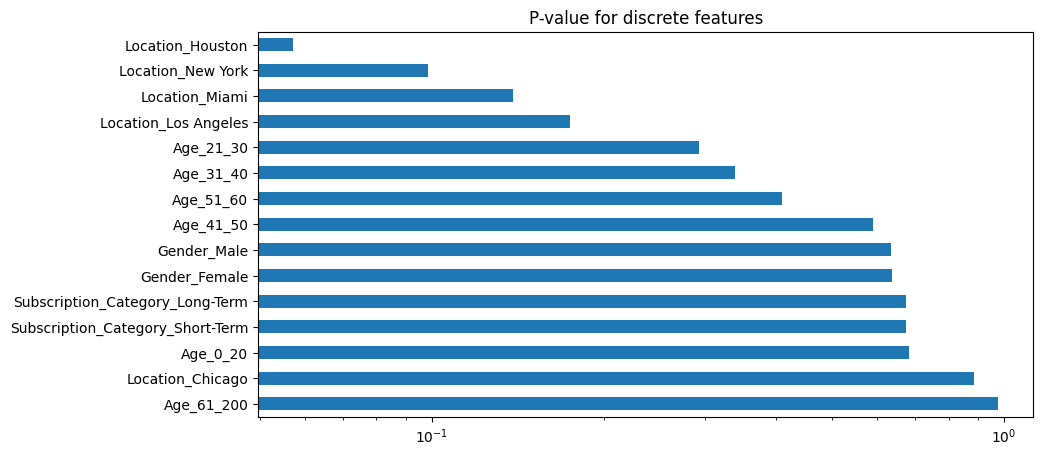

In [ ]:
# Plotting p values for chi2 test for discrete features
plt.figure(figsize=(10,5))
plt.xscale('log')
plt.xlabel('P-value')
plt.title('P-value for discrete features')
p_values.plot.barh()

* **Since column Location_Houston has the smallest p value, we can say that it is the most important feature (among the categorical independent variables) which determines  the outcome of the dependent variable.**
* **The Age_61_200 feature has the highest p-value, which indicates that it is the least important feature (among categorical independent variables).**


## 2. Outlier and Anomaly Treatment

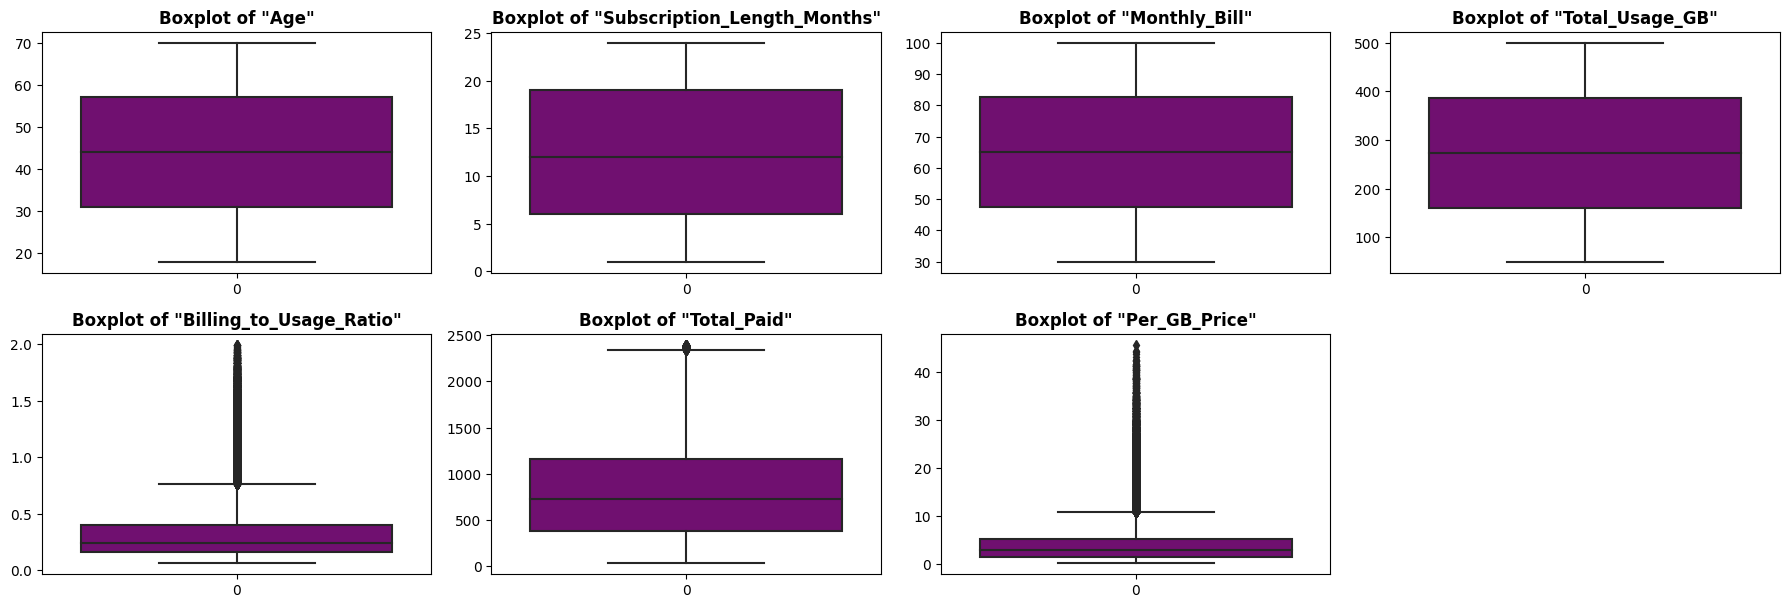

In [ ]:
# Analyzing outliers of the Numerical features with the help of box plot

plt.figure(figsize = (18,15))
for i, column in enumerate(numerical_features) :
  plt.subplot(5,4,i+1)
  sns.boxplot(cc_df_copy[column], color= ('purple'))
  plt.title (f'Boxplot of "{column}"', weight = 'bold')
  plt.tight_layout()
plt.show();


Explaination:-
*  In some cases, outliers can represent meaningful data points and removing them may lead to loss of important information.


In [ ]:
# checking if our numerical features which cant have 0 value have it or not.

for col in ['Age', 'Subscription_Length_Months', 'Monthly_Bill']:
  zero_indices = cc_df_copy[cc_df_copy[col] ==0].index
  count= len(zero_indices)
  if count > 0:
    print(f' "{col}" has {count} zero values in it and those are \n  {zero_indices}  \n' )
  else:
    print(f'No 0 values present in "{col}"')


No 0 values present in "Age"
No 0 values present in "Subscription_Length_Months"
No 0 values present in "Monthly_Bill"


Explaination:-
* There are no such impossible values in our dataset, ex- 0 Age, 0 Monthly_Bill or values in minus in age. All these situatuions are error in data collection.

In [ ]:
# Checking range of each column
ranges_=[]
for col in numerical_features:

  column_range = (cc_df_copy[col].min(), cc_df_copy[col].max())
  ranges_.append(column_range)

ranges_df=pd.DataFrame({'columns' :numerical_features,
                      'Range' :[i for i in ranges_],
                      })
ranges_df

,columns,Range
0,Age,"(18, 70)"
1,Subscription_Length_Months,"(1, 24)"
2,Monthly_Bill,"(30.0, 100.0)"
3,Total_Usage_GB,"(50, 500)"
4,Billing_to_Usage_Ratio,"(0.06018036072144289, 1.9991999999999999)"
5,Total_Paid,"(30.06, 2399.52)"
6,Per_GB_Price,"(0.06114457831325301, 45.815999999999995)"


Explaination:-
* no 0 values in the columns.
* Range is fine no anomaly detected

## 3. Multi colinearity Check (VIF)

In classification problem multi colinearity is not a problem and is sometimes helpful, So we will not check VIF of the features or remove them.

### Defining function

In [ ]:
# # Defining function to check VIF
def vif_calculator(name_):
   '''Calculates VIF'''
   vif_1 = pd.DataFrame()
   vif_1["variables"] = name_.columns
   vif = [variance_inflation_factor(name_.values, i) for i in range(0,name_.shape[1])]
   vif_1["VIF"] = vif
   vif_1.sort_values(by='VIF', ascending=False, inplace=True)

   return vif_1

### Checking VIF for all the independent variables

In [ ]:
# Checking VIF for all Independent numeric columns
vif_calculator(cc_df_copy[[i for i in independent_features]])

,variables,VIF
0,Gender_Male,inf
8,Age_21_30,inf
14,Subscription_Category_Long-Term,inf
13,Subscription_Category_Short-Term,inf
12,Age_61_200,inf
1,Gender_Female,inf
10,Age_41_50,inf
9,Age_31_40,inf
11,Age_51_60,inf
7,Age_0_20,inf


Explaination:-
* As we are interested in classification, we do not need to get rid of collinear variables. These will influence our coefficients, but not the predictions. We can just leave them in.

## 4. Class Imbalance handling


In [ ]:
def clr():
  colors=['green', 'blue', 'purple','red', 'orange', 'maroon', 'yellow', ]
  clr= random.choice(colors)
  return clr

def clr_pal():
   clr_pal=random.choice([ "bright", "dark", "colorblind","rocket", "icefire","Spectral","coolwarm", "Paired", "Set2"])
   return clr_pal

0    50221
1    49779
Name: Churn, dtype: int64


Text(0.5, 1.0, 'Distribution of TenYearCHD')

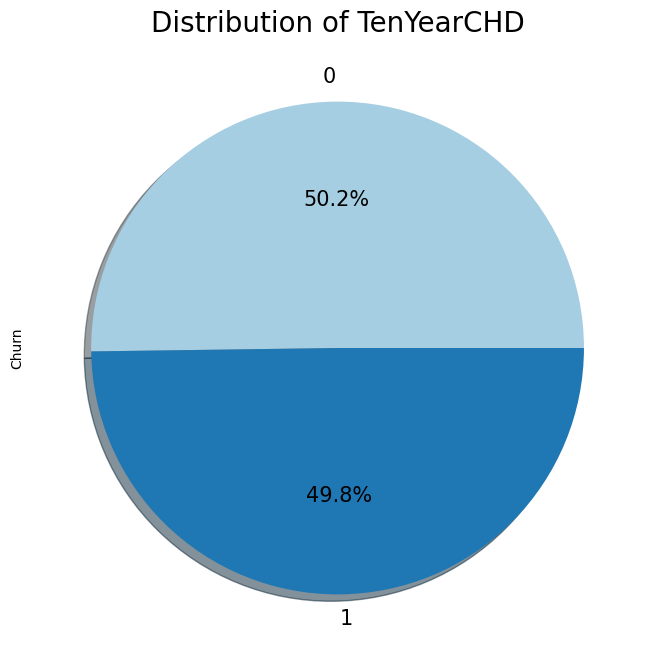

In [ ]:
# Distribution of TenYearCHD
print(cc_df_copy['Churn'].value_counts())
plt.figure(figsize=(16,8))
palette_color = sns.color_palette(clr_pal())
cc_df_copy['Churn'].value_counts().plot(kind='pie',colors=palette_color , autopct='%1.1f%%' , fontsize=15 , shadow=True)
plt.title('Distribution of TenYearCHD', fontsize=20)

Explaination:-
*  We can see there is almost equal number of count of each classes so we do not have class imbalance problem.


## 5. Feature transformation

### Distribution check

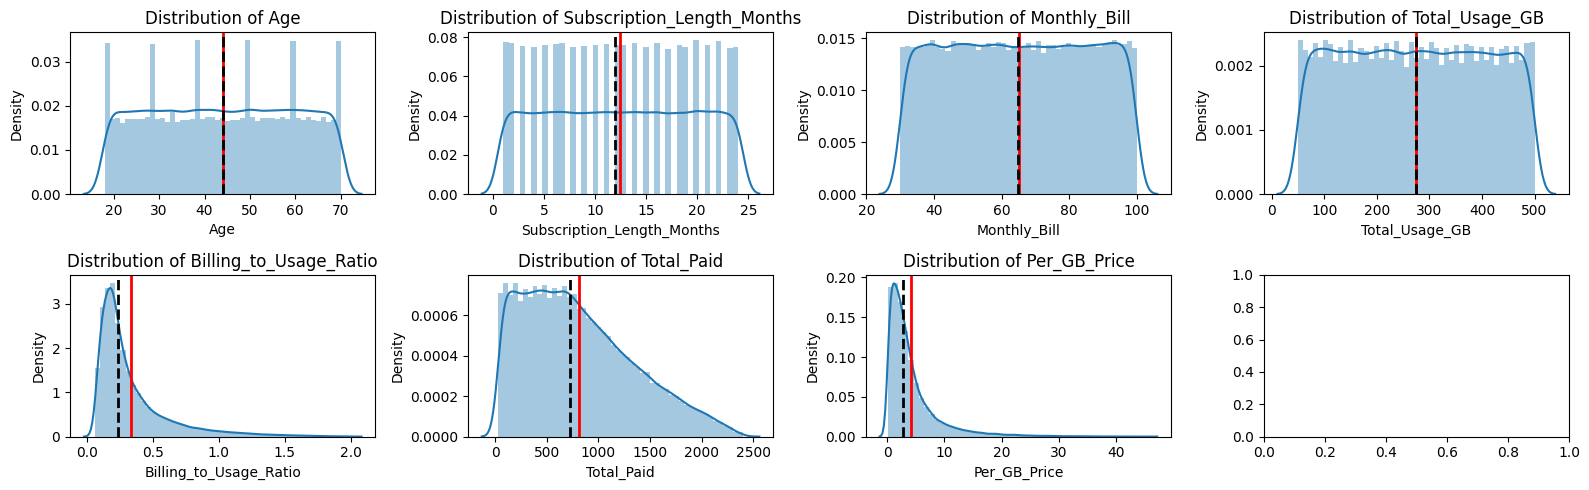

['Age', 'Subscription_Length_Months', 'Monthly_Bill', 'Total_Usage_GB', 'Billing_to_Usage_Ratio', 'Total_Paid', 'Per_GB_Price']


In [ ]:
# Create a figure with 5 rows and 6 columns
fig, ax = plt.subplots(2,4, figsize=(16,5), tight_layout=True)

# Plot the distribution of each column in the dataframe
for i, col in enumerate(numerical_features):
    row = i // 4
    col_idx = i % 4
    sns.distplot(cc_df_copy[col], ax=ax[row, col_idx])
    ax[row, col_idx].axvline(cc_df_copy[col].mean(), color='red', linestyle='solid', linewidth=2 )
    ax[row, col_idx].axvline(cc_df_copy[col].median(), color='black', linestyle='dashed', linewidth=2 )
    ax[row, col_idx].set_title(f'Distribution of {col}')
    ax[row, col_idx].set_xlabel(col)

plt.show()

print(numerical_features)

### Skewness Check

In [ ]:
# Calculate the skew value for each column
skew_values = cc_df_copy[numerical_features].skew()

# Print the skew values for each column
print(skew_values)

Age                          -0.002689
Subscription_Length_Months   -0.001655
Monthly_Bill                 -0.000326
Total_Usage_GB                0.007113
Billing_to_Usage_Ratio        2.180535
Total_Paid                    0.620774
Per_GB_Price                  2.755720
dtype: float64


Explaination:-
* Here in all the 7 numerical continous columns we have Billing_to_Usage_Ratio and Per_GB_Price most skewed and Total_Paid has some skewness.

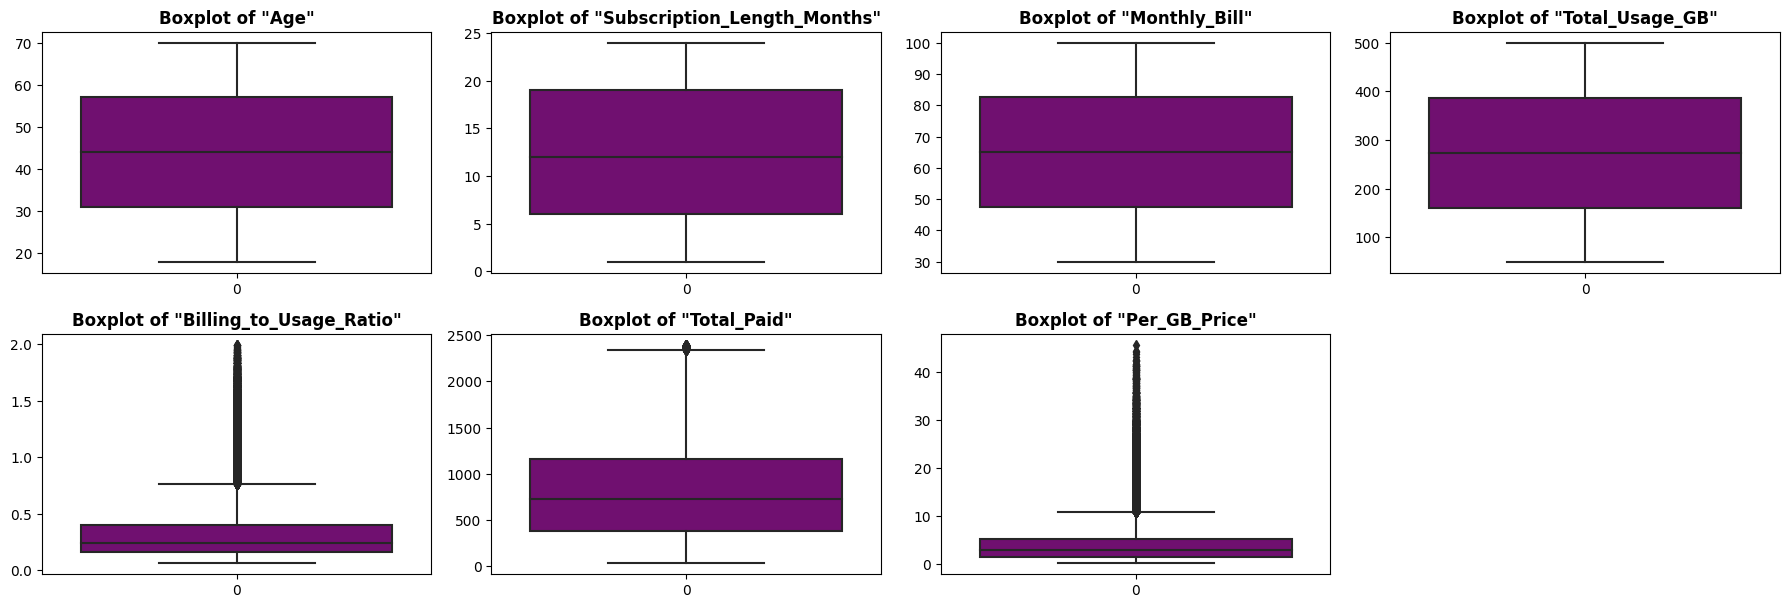

In [ ]:
# Analyzing outliers of the Numerical features with the help of box plot

plt.figure(figsize = (18,15))
for i, column in enumerate(numerical_features) :
  plt.subplot(5,4,i+1)
  sns.boxplot(cc_df_copy[column], color= ('purple'))
  plt.title (f'Boxplot of "{column}"', weight = 'bold')
  plt.tight_layout()
plt.show();


### Transforming features

In [ ]:

# def transformer():
# '''This function tzkes data and transforms the column with log or sqrt whichver is better'''


what_happened=[]
i=0
skew_values = cc_df_copy[numerical_features].skew()

for col in numerical_features:

  x1= (np.sqrt(cc_df_copy[col])).skew()
  x= abs((np.sqrt(cc_df_copy[col])).skew())
  y= np.log(cc_df_copy[col])
  y = y.replace(-np.inf, np.nan)
  y= y.fillna(0)
  y1= y.skew()
  y= abs(y.skew())




  if abs(skew_values[i])<x and abs(skew_values[i])< y:
    cc_df_copy[col]=cc_df_copy[col]
    show='No transformation'
    what_happened.append(show)


  elif x < y:
    cc_df_copy[col]=np.sqrt(cc_df_copy[col])
    show='Squareroot'
    what_happened.append(show)

  else:
    cc_df_copy[col]=np.log(cc_df_copy[col])
    cc_df_copy[col] = np.where(np.isinf(cc_df_copy[col]), 0, cc_df_copy[col])
    show='Log'
    what_happened.append(show)

  i=i+1

data=pd.DataFrame({'columns' :numerical_features,
                      'Transformation Type' :[i for i in what_happened],
                      'Old skew value' :[i for i in skew_values],
                      'New skew value' :[i for i in cc_df_copy[numerical_features].skew()]
                      })
data


,columns,Transformation Type,Old skew value,New skew value
0,Age,No transformation,-0.002689,-0.002689
1,Subscription_Length_Months,No transformation,-0.001655,-0.001655
2,Monthly_Bill,No transformation,-0.000326,-0.000326
3,Total_Usage_GB,No transformation,0.007113,0.007113
4,Billing_to_Usage_Ratio,Log,2.180535,0.456643
5,Total_Paid,Squareroot,0.620774,-0.052282
6,Per_GB_Price,Log,2.755720,-0.409833


### Range Check

In [ ]:
# Checking range of each column
ranges_=[]
for col in numerical_features:

  column_range = (cc_df_copy[col].min(), cc_df_copy[col].max())
  ranges_.append(column_range)

ranges_df=pd.DataFrame({'columns' :numerical_features,
                      'Range' :[i for i in ranges_],
                      })
ranges_df

,columns,Range
0,Age,"(18, 70)"
1,Subscription_Length_Months,"(1, 24)"
2,Monthly_Bill,"(30.0, 100.0)"
3,Total_Usage_GB,"(50, 500)"
4,Billing_to_Usage_Ratio,"(-2.8104092137562797, 0.6927471005386056)"
5,Total_Paid,"(5.482700064749119, 48.98489563120452)"
6,Per_GB_Price,"(-2.794514082868747, 3.824633375091556)"


### Distribution Check

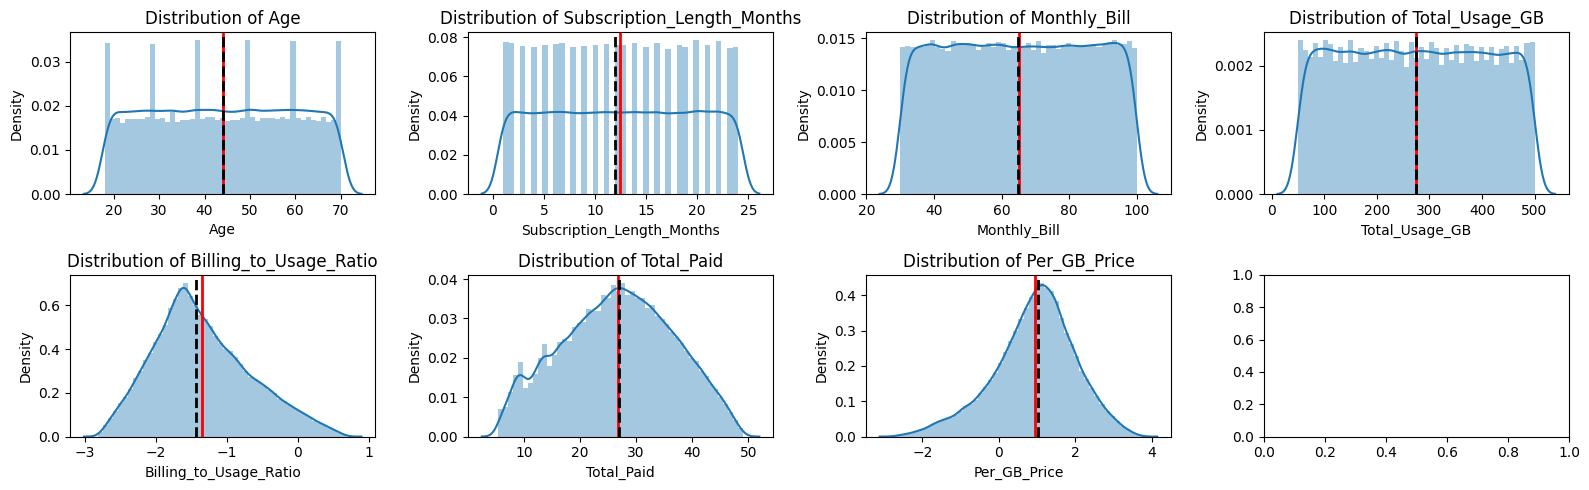

['Age', 'Subscription_Length_Months', 'Monthly_Bill', 'Total_Usage_GB', 'Billing_to_Usage_Ratio', 'Total_Paid', 'Per_GB_Price']


In [ ]:
# Create a figure with 5 rows and 6 columns
fig, ax = plt.subplots(2,4, figsize=(16,5), tight_layout=True)

# Plot the distribution of each column in the dataframe
for i, col in enumerate(numerical_features):
    row = i // 4
    col_idx = i % 4
    sns.distplot(cc_df_copy[col], ax=ax[row, col_idx])
    ax[row, col_idx].axvline(cc_df_copy[col].mean(), color='red', linestyle='solid', linewidth=2 )
    ax[row, col_idx].axvline(cc_df_copy[col].median(), color='black', linestyle='dashed', linewidth=2 )
    ax[row, col_idx].set_title(f'Distribution of {col}')
    ax[row, col_idx].set_xlabel(col)

plt.show()

print(numerical_features)

In [ ]:
# Calculate the skew value for each column
skew_values = cc_df_copy[numerical_features].skew()

# Print the skew values for each column
print(skew_values)

Age                          -0.002689
Subscription_Length_Months   -0.001655
Monthly_Bill                 -0.000326
Total_Usage_GB                0.007113
Billing_to_Usage_Ratio        0.456643
Total_Paid                   -0.052282
Per_GB_Price                 -0.409833
dtype: float64


## 6. Feature Scaling

In [ ]:
# extract the features from the DataFrame
df_features = cc_df_copy[numerical_features]

# initialize the scaler
scaler = MinMaxScaler()

# fit the scaler to the extracted features
scaler.fit(df_features)

# transform the extracted features
df_features_scaled = pd.DataFrame(scaler.transform(df_features), columns=df_features.columns)

# merge the scaled features back into the original DataFrame
cc_df_copy = df_features_scaled.join(cc_df_copy.drop(numerical_features, axis=1))

In [ ]:
cc_df_copy.head()

,Age,Subscription_Length_Months,Monthly_Bill,Total_Usage_GB,Billing_to_Usage_Ratio,Total_Paid,Per_GB_Price,Churn,Gender_Female,Gender_Male,...,Location_Miami,Location_New York,Age_0_20,Age_21_30,Age_31_40,Age_41_50,Age_51_60,Age_61_200,Subscription_Category_Long-Term,Subscription_Category_Short-Term
0,0.865385,0.695652,0.619429,0.413333,0.468708,0.685756,0.673693,0,0,1,...,0,0,0,0,0,0,0,1,1,0
1,0.846154,0.000000,0.268000,0.271111,0.442408,0.034484,0.231741,0,1,0,...,0,1,0,0,0,0,0,1,0,1
2,0.115385,0.173913,0.792429,0.911111,0.321809,0.349172,0.411064,0,1,0,...,0,0,0,1,0,0,0,0,0,1
3,0.346154,0.086957,0.970571,0.548889,0.485571,0.267997,0.420560,1,1,0,...,1,0,0,0,1,0,0,0,0,1
4,0.538462,0.782609,0.402000,0.480000,0.368173,0.637984,0.637289,0,1,0,...,1,0,0,0,0,1,0,0,1,0


# **MODEL IMPLEMENTATION**

## **Choice of prediction model:**



* We are working on binary classification problem.
* Here we can start with a simple model, as a baseline model, which is interpretable, ie, Logistic Regression
* Try other standard binary classification models like Naive Bayes, Random forest classifier, and support vector machines.
* Use ensemble models, with hyperparameter tuning to check whether they give better predictions.

## **Evaluation Metrics Selection**




---

* Also, since we are dealing with data related to customer retention and churn problem, we choose precision over recall because False positives in churn prediction can sometimes lead to unnecessary retention efforts, which can be costly. Precision is crucial in situations where the cost of retention efforts is significant and should be spent wisely.
* In other words, it doesn’t matter whether we raise a false alarm but the actual positive cases should not go undetected
* Considering these points in mind, it is decided that we use **Precision** as the model evaluation metric.


---




\begin{align}
Precision = \frac{True Positive}{True Positive + False Positive}
\end{align}
---    

In [ ]:
# function to get precision score

def precision(actual, predicted):
    '''
    precision(actual, predicted)
    '''
    return precision_score(y_true=actual, y_pred=predicted, average='binary')

## **Train Test Split**





* Since we are working with limited amount of data, ie, around 3390 records, **30%** of the records are set aside for testing, 70%  for training.
* Since the data is imbalanced, **stratified split** was employed to get almost equal proportion of dependent variables in the train and test sets.

In [ ]:
# Split the dataset into X (independent features) and y (dependent feature)
X = cc_df_copy[independent_features]
y = cc_df_copy[dependent_features]



In [ ]:
# Split the data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=30)



In [ ]:
x_val = x_train[:20000]
y_val = y_train[:20000]

In [ ]:
print("--------------------------------------------------")
print("shape of x_train is " ,x_train.shape)
print("--------------------------------------------------")
print("shape of y_train is " ,y_train.shape)
print("--------------------------------------------------")
print("Class distribution in y_train is \n",y_train.value_counts())
print("--------------------------------------------------")
print("Class distribution in y_test is \n",y_test.value_counts())
print("--------------------------------------------------")


--------------------------------------------------
shape of x_train is  (90000, 22)
--------------------------------------------------
shape of y_train is  (90000, 1)
--------------------------------------------------
Class distribution in y_train is 
 Churn
0        45277
1        44723
dtype: int64
--------------------------------------------------
Class distribution in y_test is 
 Churn
1        5056
0        4944
dtype: int64
--------------------------------------------------


## **Report Keeper Function**

In [ ]:
# Defining my tables to keep report
test_report = pd.DataFrame(columns = ['Model', 'Accuracy','Precision', 'Recall','Specificity', 'F1 Score','ROC'])
train_report = pd.DataFrame(columns = ['Model', 'Accuracy','Precision', 'Recall','Specificity', 'F1 Score','ROC'])

def reportkeeper(model_name, test_preds, train_preds):
#----------For Test Data-------------------------------------------------------------------------------------------
  cm=  confusion_matrix(y_test, test_preds)
  TN = cm[0][0]
  FN = cm[1][0]
  TP = cm[1][1]
  FP = cm[0][1]

  specificity = TN/(TN+FP)
  acc= accuracy_score(y_test, test_preds)
  roc=roc_auc_score(y_test, test_preds)
  prec = precision_score(y_test, test_preds)
  rec = recall_score(y_test, test_preds)
  f1 = f1_score(y_test, test_preds)

  new_row = {'Model':model_name, 'Accuracy':acc, 'Precision':prec, 'Recall':rec, 'Specificity': specificity , 'F1 Score': f1 ,'ROC': roc}
  test_report.loc[len(test_report)] = new_row

#----------For Train Data-------------------------------------------------------------------------------------------

  cm=  confusion_matrix(y_train, train_preds)
  TN = cm[0][0]
  FN = cm[1][0]
  TP = cm[1][1]
  FP = cm[0][1]

  specificity = TN/(TN+FP)
  acc= accuracy_score(y_train, train_preds)
  roc=roc_auc_score(y_train, train_preds)
  prec = precision_score(y_train, train_preds)
  rec = recall_score(y_train, train_preds)
  f1 = f1_score(y_train, train_preds)

  new_row = {'Model':model_name, 'Accuracy':acc, 'Precision':prec, 'Recall':rec, 'Specificity': specificity , 'F1 Score': f1 ,'ROC': roc}
  train_report.loc[len(train_report)] = new_row


## **Logistic Regression**

### 1. Model Training and Implementation

In [ ]:
# create and train logistic regression model
lr_model = LogisticRegression(fit_intercept=True, max_iter=10000,random_state=0)
lr_model.fit(x_train, y_train)

LogisticRegression(max_iter=10000, random_state=0)

### 2. Coefficients, Confusion Matrix and Reports

In [ ]:
# Get the model coefficients
lr_model.coef_

array([[ 2.84927650e-03, -3.61617446e-03,  1.32339207e-03,
        -5.99827821e-03, -4.66480901e-03,  3.09115995e-03,
         5.48163725e-03, -4.86943658e-04, -3.50335785e-03,
         2.86963522e-03, -1.73085251e-03,  2.81354964e-03,
        -7.28928793e-04, -1.03406281e-03,  2.67164853e-04,
         7.59092532e-05, -1.34115519e-03, -4.76351725e-04,
         2.42577598e-05,  8.37828385e-04,  8.41148450e-06,
         4.82805536e-03]])

In [ ]:
# Get the accuracy scores for Train-----------------------------------------------------------
train_preds = lr_model.predict(x_train)
train_accuracy = accuracy_score(train_preds,y_train)
print("The accuracy on train data is ", train_accuracy)

# Get the accuracy scores for Test-----------------------------------------------------------
test_preds = lr_model.predict(x_test)
test_accuracy = accuracy_score(test_preds,y_test)
print("The accuracy on test data is ", test_accuracy)

The accuracy on train data is  0.5052222222222222
The accuracy on test data is  0.4939


--------------------Train Report-----------------------

[[39269  6008]
 [38522  6201]]


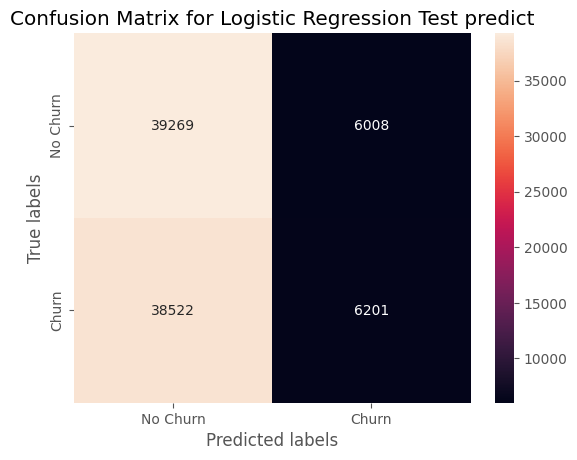

--------------------Test Report-----------------------

[[4264  680]
 [4381  675]]


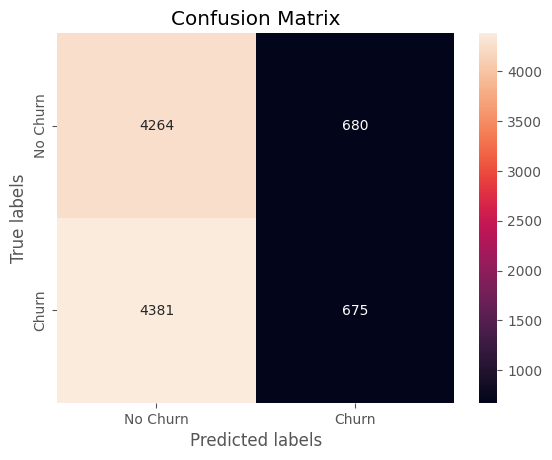

In [ ]:
# Get the confusion matrix for train-----------------------------------------------------------
print("--------------------Train Report-----------------------\n")
labels = ['No Churn',  'Churn']
cm = confusion_matrix(y_train, train_preds)
print(cm)
ax= plt.subplot()
sns.heatmap(cm, annot=True, ax = ax, fmt='d') #annot=True to annotate cells
# labels, title and ticks
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix for Logistic Regression Test predict')
ax.xaxis.set_ticklabels(labels)
ax.yaxis.set_ticklabels(labels)
plt.show()

# Get the confusion matrix for test-----------------------------------------------------------
print("--------------------Test Report-----------------------\n")
labels = ['No Churn',  'Churn']
cm = confusion_matrix(y_test, test_preds)
print(cm)
ax= plt.subplot()
sns.heatmap(cm, annot=True, ax = ax,fmt='d') #annot=True to annotate cells
# labels, title and ticks
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix')
ax.xaxis.set_ticklabels(labels)
ax.yaxis.set_ticklabels(labels)
plt.show()

In [ ]:
# Print the classification report for train-----------------------------------------------------------
print("--------------------Train Report-----------------------\n")
print('ROCAUC score:', roc_auc_score(y_train, train_preds))
print('Accuracy score:', accuracy_score(y_train, train_preds))
print(classification_report(y_train, train_preds))


# Print the classification report for test-----------------------------------------------------------
print("--------------------Test Report-----------------------\n")
print('ROCAUC score:', roc_auc_score(y_test, test_preds))
print('Accuracy score:', accuracy_score(y_test, test_preds))
print(classification_report(y_test, test_preds))

# Data uploading to Report keeper
reportkeeper(model_name= 'Logistic Regression', test_preds= test_preds, train_preds= train_preds)

--------------------Train Report-----------------------

ROCAUC score: 0.502979592652427
Accuracy score: 0.5052222222222222
              precision    recall  f1-score   support

           0       0.50      0.87      0.64     45277
           1       0.51      0.14      0.22     44723

    accuracy                           0.51     90000
   macro avg       0.51      0.50      0.43     90000
weighted avg       0.51      0.51      0.43     90000

--------------------Test Report-----------------------

ROCAUC score: 0.49798214688050474
Accuracy score: 0.4939
              precision    recall  f1-score   support

           0       0.49      0.86      0.63      4944
           1       0.50      0.13      0.21      5056

    accuracy                           0.49     10000
   macro avg       0.50      0.50      0.42     10000
weighted avg       0.50      0.49      0.42     10000



### 3. Feature Importance

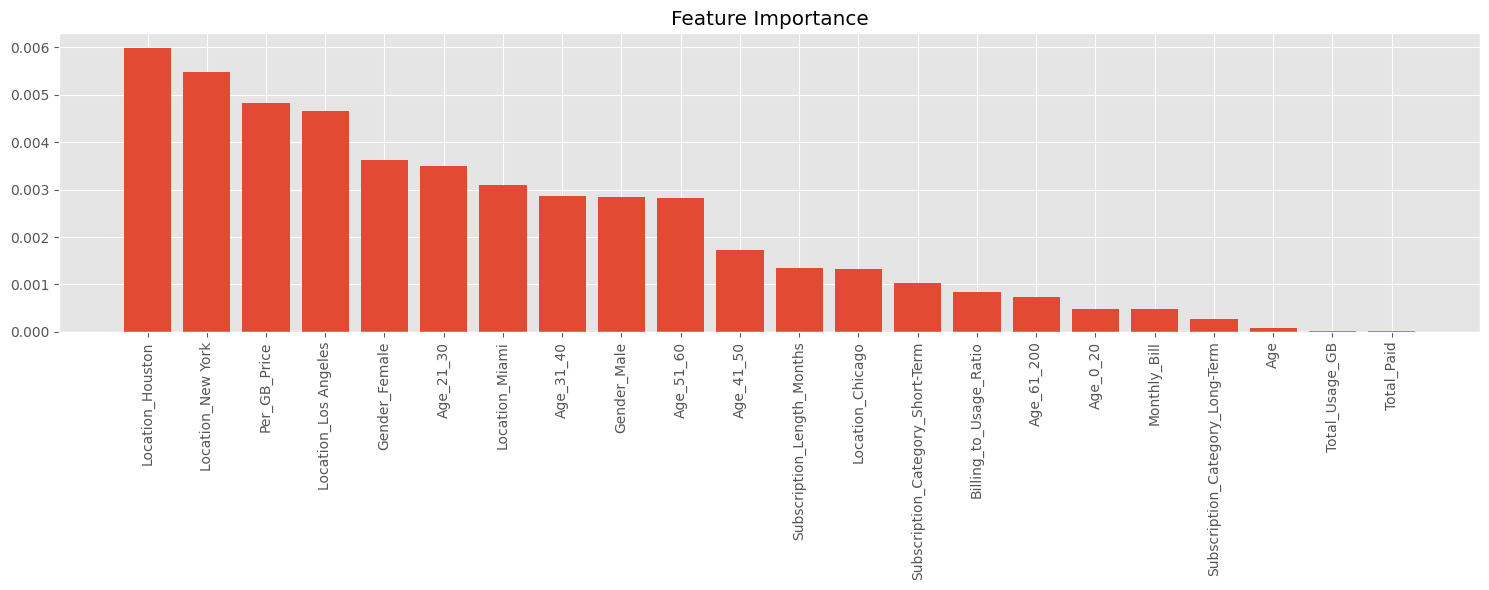

In [ ]:
importance = np.abs(lr_model.coef_[0])

feature = x_train.columns
indices = np.argsort(importance)
indices = indices[::-1]

plt.figure(figsize=(15,6))
plt.xticks(rotation=90)
plt.bar(range(len(indices)),importance[indices])
plt.xticks(range(len(indices)), [feature[i] for i in indices])
plt.title('Feature Importance')
plt.tight_layout()

## **Random Forest Classifier**

### 1. Model Training and Implementation

In [ ]:
# Random forest model
rf_model = RandomForestClassifier()



# Using gridsearchcv to find best parameters
rf_params = {'n_estimators':[200],
             'max_depth':np.arange(18,22),
             'min_samples_split':[2,3,4,5],
             'min_samples_leaf':[2,4]}

rf_gridsearch = GridSearchCV(rf_model,
                             rf_params,
                             cv=5,
                             scoring='recall')

# rf_gridsearch.fit(x_val,y_val)

# rf_best_params = rf_gridsearch.best_params_

In [ ]:
# Fitting RF model with best parameters
# rf_model = RandomForestClassifier(criterion="entropy",
#                                   n_estimators=rf_best_params['n_estimators'],
#                                   min_samples_leaf=rf_best_params['min_samples_leaf'],
#                                   min_samples_split=rf_best_params['min_samples_split'],
#                                   max_depth=rf_best_params['max_depth'],
#                                   random_state=0)

rf_model =  RandomForestClassifier(criterion='entropy', max_depth=21, min_samples_leaf=4, n_estimators=200, random_state=0)
rf_model.fit(x_train,y_train)



RandomForestClassifier
# RandomForestClassifier(criterion='entropy', max_depth=21, min_samples_leaf=4, n_estimators=200, random_state=0)

sklearn.ensemble._forest.RandomForestClassifier

### 2. Best Model Parameters and Reports

In [ ]:
# dt_best_params = rf_gridsearch.best_params_
# dt_best_params

In [ ]:
# Get the accuracy scores for Train-----------------------------------------------------------
train_preds = rf_model.predict(x_train)
train_accuracy = accuracy_score(train_preds,y_train)
print("The accuracy on train data is ", train_accuracy)

# Get the accuracy scores for Test-----------------------------------------------------------
test_preds = rf_model.predict(x_test)
test_accuracy = accuracy_score(test_preds,y_test)
print("The accuracy on test data is ", test_accuracy)

The accuracy on train data is  0.9423111111111111
The accuracy on test data is  0.4981


--------------------Train Report-----------------------

[[43286  1991]
 [ 3201 41522]]


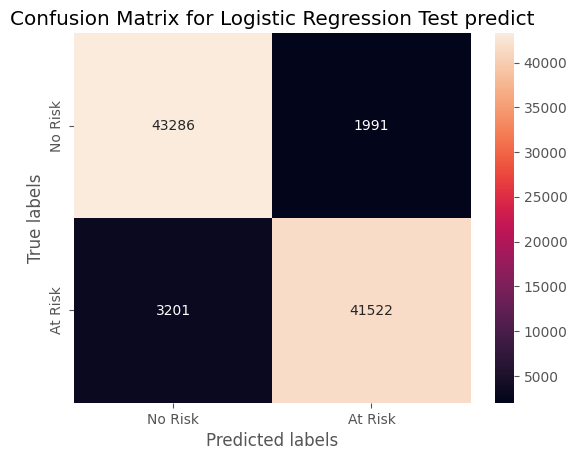

--------------------Test Report-----------------------

[[2623 2321]
 [2698 2358]]


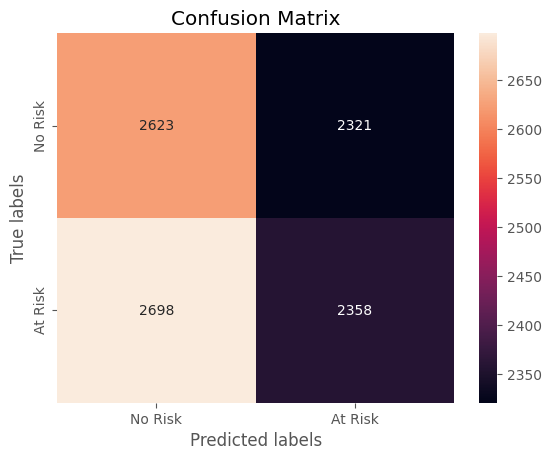

In [ ]:
# Get the confusion matrix for train-----------------------------------------------------------
print("--------------------Train Report-----------------------\n")
labels = ['No Risk', 'At Risk']
cm = confusion_matrix(y_train, train_preds)
print(cm)
ax= plt.subplot()
sns.heatmap(cm, annot=True, ax = ax, fmt='d') #annot=True to annotate cells
# labels, title and ticks
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix for Logistic Regression Test predict')
ax.xaxis.set_ticklabels(labels)
ax.yaxis.set_ticklabels(labels)
plt.show()

# Get the confusion matrix for test-----------------------------------------------------------
print("--------------------Test Report-----------------------\n")
labels = ['No Risk', 'At Risk']
cm = confusion_matrix(y_test, test_preds)
print(cm)
ax= plt.subplot()
sns.heatmap(cm, annot=True, ax = ax,fmt='d') #annot=True to annotate cells
# labels, title and ticks
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix')
ax.xaxis.set_ticklabels(labels)
ax.yaxis.set_ticklabels(labels)
plt.show()

In [ ]:
# Print the classification report for train-----------------------------------------------------------
print("--------------------Train Report-----------------------\n")
print('ROCAUC score:', roc_auc_score(y_train, train_preds))
print('Accuracy score:', accuracy_score(y_train, train_preds))
print(classification_report(y_train, train_preds))


# Print the classification report for test-----------------------------------------------------------
print("--------------------Test Report-----------------------\n")
print('ROCAUC score:', roc_auc_score(y_test, test_preds))
print('Accuracy score:', accuracy_score(y_test, test_preds))
print(classification_report(y_test, test_preds))

# Data uploading to Report keeper
reportkeeper(model_name= 'Random Forest', test_preds=test_preds, train_preds= train_preds)

--------------------Train Report-----------------------

ROCAUC score: 0.9422261639858452
Accuracy score: 0.9423111111111111
              precision    recall  f1-score   support

           0       0.93      0.96      0.94     45277
           1       0.95      0.93      0.94     44723

    accuracy                           0.94     90000
   macro avg       0.94      0.94      0.94     90000
weighted avg       0.94      0.94      0.94     90000

--------------------Test Report-----------------------

ROCAUC score: 0.4984593267379459
Accuracy score: 0.4981
              precision    recall  f1-score   support

           0       0.49      0.53      0.51      4944
           1       0.50      0.47      0.48      5056

    accuracy                           0.50     10000
   macro avg       0.50      0.50      0.50     10000
weighted avg       0.50      0.50      0.50     10000



### 3. Feature Importance

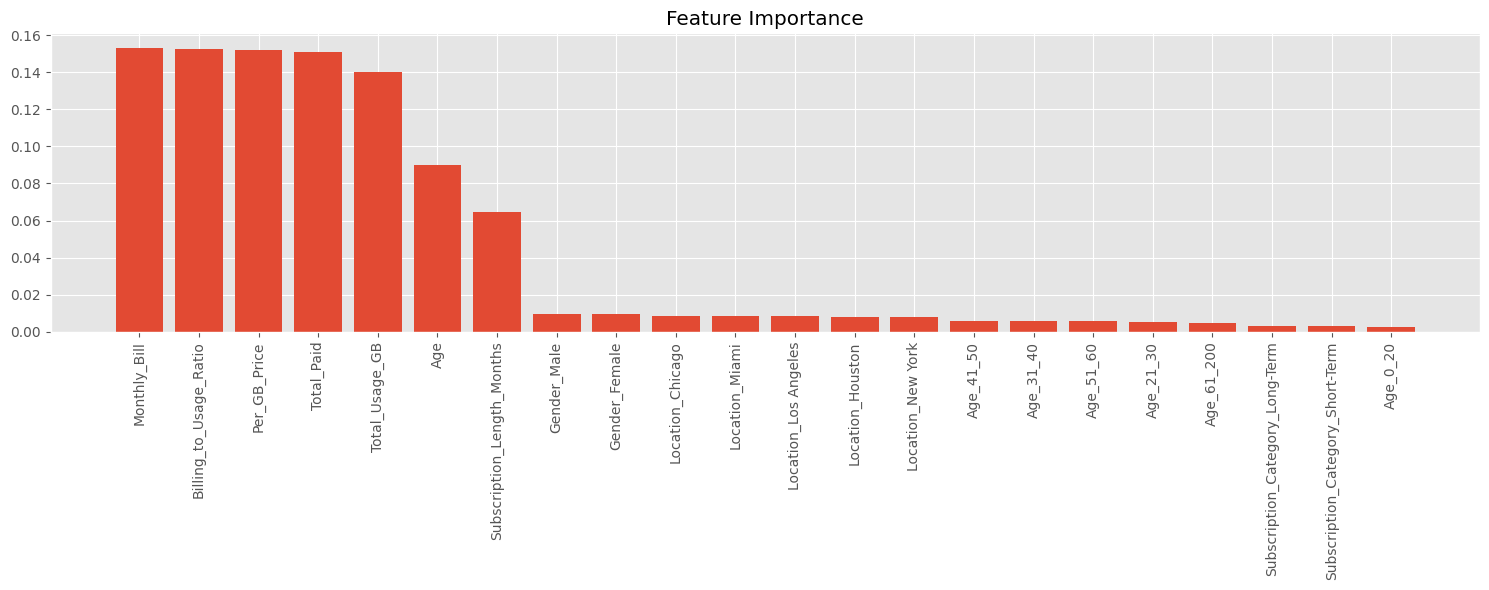

In [ ]:
# Feature Importance
importance = rf_model.feature_importances_
feature = x_train.columns
indices = np.argsort(importance)
indices = indices[::-1]

plt.figure(figsize=(15,6))
plt.xticks(rotation=90)
plt.bar(range(len(indices)),importance[indices])
plt.xticks(range(len(indices)), [feature[i] for i in indices])
plt.title('Feature Importance')
plt.tight_layout()
plt.show()

## **Support Vector Classifier**


### 1. Model Training and Implementation

In [ ]:
# SVM model parameters

svm_model = SVC(random_state=0)
svm_params = {'C': [0.1, 1, 10],
              'gamma': [0.01, 0.001, 0.0001],
              'kernel': ['rbf'],
             }

# Using gridsearchcv to find best parameters
svm_gridsearch = GridSearchCV(svm_model,
                              svm_params,
                              cv=5,
                              scoring= 'recall')

# svm_gridsearch.fit(x_val,y_val)
# svm_best_params = svm_gridsearch.best_params_

In [ ]:
# building knn model with best parameters
# svm_model = SVC(C=svm_best_params['C'],
#                 gamma=svm_best_params['gamma'],
#                 kernel=svm_best_params['kernel'],
#                 probability= True)

svm_model = SVC(C=10, gamma=0.001, kernel='rbf', probability=True)

# training the model
svm_model.fit(x_train,y_train)


# {'C': 10, 'gamma': 0.001, 'kernel': 'rbf'}

NameError: ignored

### 2. Best Model Parameters and Reports

In [ ]:
# # Best parameters
# svm_best_params = svm_gridsearch.best_params_
# print(svm_best_params)

In [ ]:
# Get the accuracy scores for Train-----------------------------------------------------------
train_preds = svm_model.predict(x_train)
train_accuracy = accuracy_score(train_preds,y_train)
print("The accuracy on train data is ", train_accuracy)

# Get the accuracy scores for Test-----------------------------------------------------------
test_preds = svm_model.predict(x_test)
test_accuracy = accuracy_score(test_preds,y_test)
print("The accuracy on test data is ", test_accuracy)

In [ ]:
# Get the confusion matrix for train-----------------------------------------------------------
print("--------------------Train Report-----------------------\n")
labels = ['No Churn',  'Churn']
cm = confusion_matrix(y_train, train_preds)
print(cm)
ax= plt.subplot()
sns.heatmap(cm, annot=True, ax = ax, fmt='d') #annot=True to annotate cells
# labels, title and ticks
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix for Logistic Regression Test predict')
ax.xaxis.set_ticklabels(labels)
ax.yaxis.set_ticklabels(labels)
plt.show()

# Get the confusion matrix for test-----------------------------------------------------------
print("--------------------Test Report-----------------------\n")
labels = ['No Churn',  'Churn']
cm = confusion_matrix(y_test, test_preds)
print(cm)
ax= plt.subplot()
sns.heatmap(cm, annot=True, ax = ax,fmt='d') #annot=True to annotate cells
# labels, title and ticks
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix')
ax.xaxis.set_ticklabels(labels)
ax.yaxis.set_ticklabels(labels)
plt.show()

In [ ]:
# Print the classification report for train-----------------------------------------------------------
print("--------------------Train Report-----------------------\n")
print('ROCAUC score:', roc_auc_score(y_train, train_preds))
print('Accuracy score:', accuracy_score(y_train, train_preds))
print(classification_report(y_train, train_preds))


# Print the classification report for test-----------------------------------------------------------
print("--------------------Test Report-----------------------\n")
print('ROCAUC score:', roc_auc_score(y_test, test_preds))
print('Accuracy score:', accuracy_score(y_test, test_preds))
print(classification_report(y_test, test_preds))

# Data uploading to Report keeper
reportkeeper(model_name= 'Support Vector Classifier', test_preds=test_preds, train_preds= train_preds)

## **XG Boost Classifier**

### 1. Model Training and Implementation

In [ ]:
# XGBOOST model
xgb_model = xgb.XGBClassifier(random_state=0)
xgb_params = {'n_estimators':[500],
             'max_depth':[10,20,30,50]
              }

# Using gridsearchcv to find best parameters
xgb_gridsearch = GridSearchCV(xgb_model,
                              xgb_params,
                              cv=5,
                              scoring='recall')

xgb_gridsearch.fit(x_val,y_val)

xgb_best_params = xgb_gridsearch.best_params_

In [ ]:
# Fitting xgb with best parameters
xgb_model = xgb.XGBClassifier(n_estimators=xgb_best_params['n_estimators'],
                                  max_depth=xgb_best_params['max_depth'],
                                  random_state=0)
xgb_model.fit(x_train,y_train)

# max_depth=10, n_estimators=500}

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=10, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=500, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=0, ...)

### 2. Best Model Parameters and Reports

In [ ]:
xgb_best_params = xgb_gridsearch.best_params_
xgb_best_params

{'max_depth': 10, 'n_estimators': 500}

In [ ]:
# Get the accuracy scores for Train-----------------------------------------------------------
train_preds = xgb_model.predict(x_train)
train_accuracy = accuracy_score(train_preds,y_train)
print("The accuracy on train data is ", train_accuracy)

# Get the accuracy scores for Test-----------------------------------------------------------
test_preds = xgb_model.predict(x_test)
test_accuracy = accuracy_score(test_preds,y_test)
print("The accuracy on test data is ", test_accuracy)

The accuracy on train data is  0.9736111111111111
The accuracy on test data is  0.5006


--------------------Train Report-----------------------

[[44184  1093]
 [ 1282 43441]]


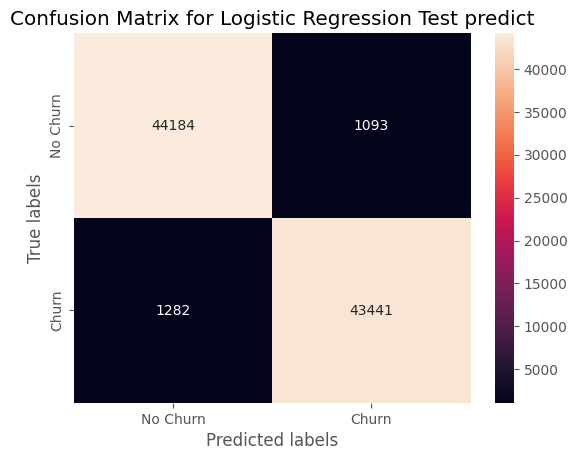

--------------------Test Report-----------------------

[[2527 2417]
 [2577 2479]]


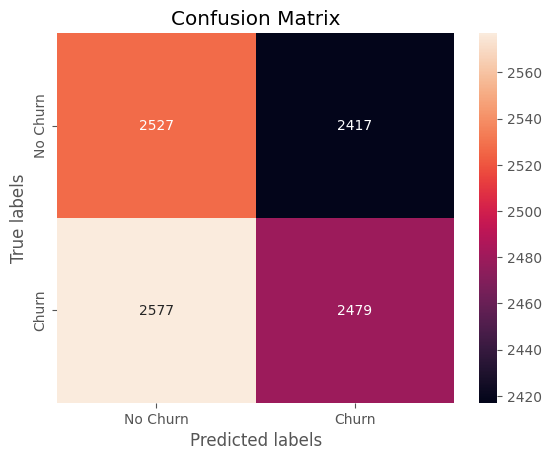

In [ ]:
# Get the confusion matrix for train-----------------------------------------------------------
print("--------------------Train Report-----------------------\n")
labels = ['No Churn',  'Churn']
cm = confusion_matrix(y_train, train_preds)
print(cm)
ax= plt.subplot()
sns.heatmap(cm, annot=True, ax = ax, fmt='d') #annot=True to annotate cells
# labels, title and ticks
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix for Logistic Regression Test predict')
ax.xaxis.set_ticklabels(labels)
ax.yaxis.set_ticklabels(labels)
plt.show()

# Get the confusion matrix for test-----------------------------------------------------------
print("--------------------Test Report-----------------------\n")
labels = ['No Churn',  'Churn']
cm = confusion_matrix(y_test, test_preds)
print(cm)
ax= plt.subplot()
sns.heatmap(cm, annot=True, ax = ax,fmt='d') #annot=True to annotate cells
# labels, title and ticks
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix')
ax.xaxis.set_ticklabels(labels)
ax.yaxis.set_ticklabels(labels)
plt.show()

In [ ]:
# Print the classification report for train-----------------------------------------------------------
print("--------------------Train Report-----------------------\n")
print('ROCAUC score:', roc_auc_score(y_train, train_preds))
print('Accuracy score:', accuracy_score(y_train, train_preds))
print(classification_report(y_train, train_preds))


# Print the classification report for test-----------------------------------------------------------
print("--------------------Test Report-----------------------\n")
print('ROCAUC score:', roc_auc_score(y_test, test_preds))
print('Accuracy score:', accuracy_score(y_test, test_preds))
print(classification_report(y_test, test_preds))

# Data uploading to Report keeper
reportkeeper(model_name= 'XG Boost', test_preds=test_preds, train_preds= train_preds)

--------------------Train Report-----------------------

ROCAUC score: 0.9735971840189297
Accuracy score: 0.9736111111111111
              precision    recall  f1-score   support

           0       0.97      0.98      0.97     45277
           1       0.98      0.97      0.97     44723

    accuracy                           0.97     90000
   macro avg       0.97      0.97      0.97     90000
weighted avg       0.97      0.97      0.97     90000

--------------------Test Report-----------------------

ROCAUC score: 0.5007165698865265
Accuracy score: 0.5006
              precision    recall  f1-score   support

           0       0.50      0.51      0.50      4944
           1       0.51      0.49      0.50      5056

    accuracy                           0.50     10000
   macro avg       0.50      0.50      0.50     10000
weighted avg       0.50      0.50      0.50     10000



### 3. Feature Importance

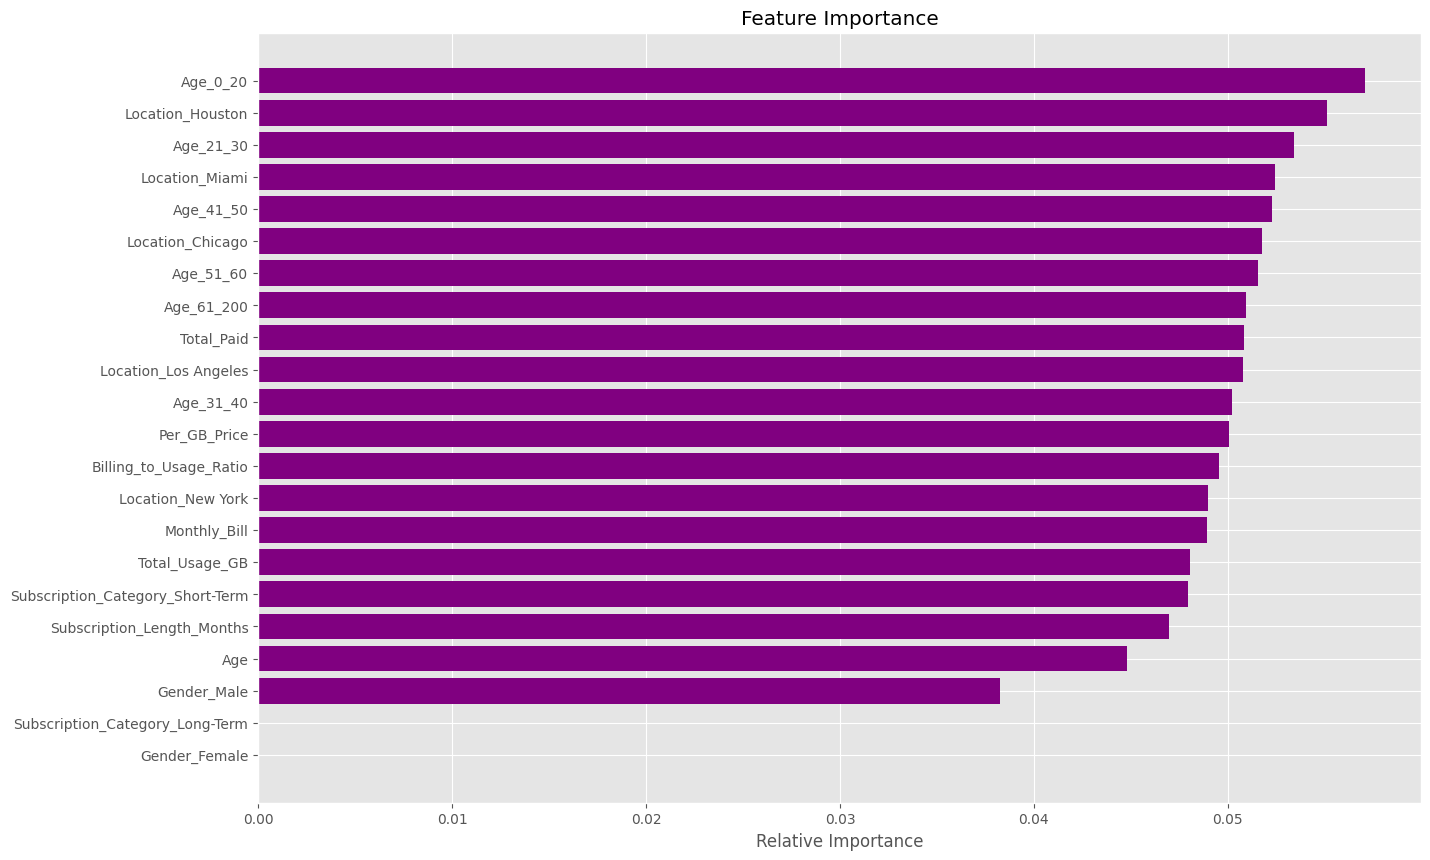

In [ ]:
# finding best estimator
optimal_xgb=xgb_gridsearch.best_estimator_

#shows the graph of feature importance
features = x_train.columns
importances = optimal_xgb.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(15,10))
plt.title('Feature Importance')
plt.barh(range(len(indices)), importances[indices], color='purple', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')

plt.show()

## **Neural Network**

In [ ]:
# Define the neural network model

input_dim = x_train.shape[1]

NN_model = keras.Sequential()

NN_model.add(layers.Input(shape=(input_dim,)))
NN_model.add(layers.Dense(64, activation='relu'))
NN_model.add(layers.Dense(1, activation='sigmoid'))
NN_model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])


In [ ]:
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

# Train the model with early stopping
epochs = 100
batch_size = 64
history = NN_model.fit(
    x_train, y_train,
    epochs=epochs,
    batch_size=batch_size,
    validation_data=(x_test, y_test),
    callbacks=[early_stopping]  # Include the EarlyStopping callback here
)

# Evaluate the model on the test dataset
test_loss, test_accuracy = NN_model.evaluate(x_test, y_test)
print(f"Test Loss: {test_loss}")
print(f"Test Accuracy: {test_accuracy}")

# Save the trained model for future use
NN_model.save('sophisticated_churn_prediction_NN_model.h5')

Epoch 1/100
1407/1407 [==============================] - 4s 2ms/step - loss: 1.9513 - accuracy: 0.4985 - val_loss: 0.7442 - val_accuracy: 0.5051
Epoch 2/100
1407/1407 [==============================] - 3s 2ms/step - loss: 0.8045 - accuracy: 0.5007 - val_loss: 0.7004 - val_accuracy: 0.5095
Epoch 3/100
1407/1407 [==============================] - 3s 2ms/step - loss: 0.8075 - accuracy: 0.5041 - val_loss: 0.7732 - val_accuracy: 0.5042
Epoch 4/100
1407/1407 [==============================] - 3s 2ms/step - loss: 0.8088 - accuracy: 0.5002 - val_loss: 0.8912 - val_accuracy: 0.4963
Epoch 5/100
1407/1407 [==============================] - 4s 3ms/step - loss: 0.8092 - accuracy: 0.5028 - val_loss: 0.7081 - val_accuracy: 0.5001
Epoch 6/100
1407/1407 [==============================] - 3s 2ms/step - loss: 0.8003 - accuracy: 0.5015 - val_loss: 0.7188 - val_accuracy: 0.5039
Epoch 7/100
1407/1407 [==============================] - 3s 2ms/step - loss: 0.7866 - accuracy: 0.4992 - val_loss: 0.9240 - val_ac

### 2. Best Model Parameters and Reports

In [ ]:
# Get the accuracy scores for Train-----------------------------------------------------------
train_preds = NN_model.predict(x_train)
train_preds = (train_preds >= 0.5).astype(int)
train_accuracy = accuracy_score(train_preds,y_train)
print("The accuracy on train data is ", train_accuracy)

# Get the accuracy scores for Test-----------------------------------------------------------
test_preds = xgb_model.predict(x_test)
test_preds = (test_preds >= 0.5).astype(int)
test_accuracy = accuracy_score(test_preds,y_test)
print("The accuracy on test data is ", test_accuracy)

2813/2813 [==============================] - 8s 3ms/step
The accuracy on train data is  0.5078222222222222
The accuracy on test data is  0.5006


--------------------Train Report-----------------------

[[31700 13577]
 [30719 14004]]


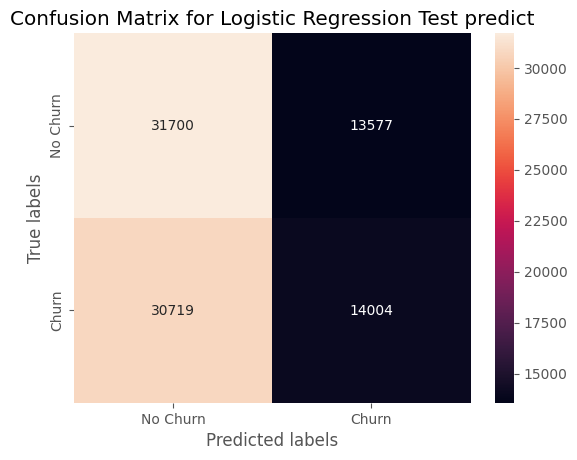

--------------------Test Report-----------------------

[[2527 2417]
 [2577 2479]]


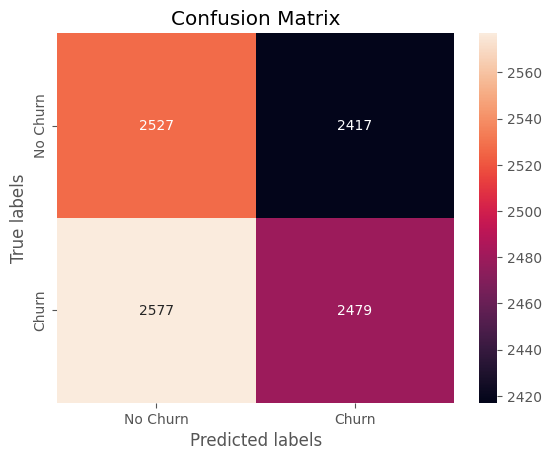

In [ ]:
# Get the confusion matrix for train-----------------------------------------------------------
print("--------------------Train Report-----------------------\n")
labels = ['No Churn',  'Churn']
cm = confusion_matrix(y_train, train_preds)
print(cm)
ax= plt.subplot()
sns.heatmap(cm, annot=True, ax = ax, fmt='d') #annot=True to annotate cells
# labels, title and ticks
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix for Logistic Regression Test predict')
ax.xaxis.set_ticklabels(labels)
ax.yaxis.set_ticklabels(labels)
plt.show()

# Get the confusion matrix for test-----------------------------------------------------------
print("--------------------Test Report-----------------------\n")
labels = ['No Churn',  'Churn']
cm = confusion_matrix(y_test, test_preds)
print(cm)
ax= plt.subplot()
sns.heatmap(cm, annot=True, ax = ax,fmt='d') #annot=True to annotate cells
# labels, title and ticks
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix')
ax.xaxis.set_ticklabels(labels)
ax.yaxis.set_ticklabels(labels)
plt.show()

In [ ]:
# Print the classification report for train-----------------------------------------------------------
print("--------------------Train Report-----------------------\n")
print('ROCAUC score:', roc_auc_score(y_train, train_preds))
print('Accuracy score:', accuracy_score(y_train, train_preds))
print(classification_report(y_train, train_preds))


# Print the classification report for test-----------------------------------------------------------
print("--------------------Test Report-----------------------\n")
print('ROCAUC score:', roc_auc_score(y_test, test_preds))
print('Accuracy score:', accuracy_score(y_test, test_preds))
print(classification_report(y_test, test_preds))

# Data uploading to Report keeper
reportkeeper(model_name= 'Neural Network', test_preds=test_preds, train_preds= train_preds)

--------------------Train Report-----------------------

ROCAUC score: 0.5066310999000811
Accuracy score: 0.5078222222222222
              precision    recall  f1-score   support

           0       0.51      0.70      0.59     45277
           1       0.51      0.31      0.39     44723

    accuracy                           0.51     90000
   macro avg       0.51      0.51      0.49     90000
weighted avg       0.51      0.51      0.49     90000

--------------------Test Report-----------------------

ROCAUC score: 0.5007165698865265
Accuracy score: 0.5006
              precision    recall  f1-score   support

           0       0.50      0.51      0.50      4944
           1       0.51      0.49      0.50      5056

    accuracy                           0.50     10000
   macro avg       0.50      0.50      0.50     10000
weighted avg       0.50      0.50      0.50     10000



# **MODEL EXPLAINABILITY**

Model explainability refers to the concept of being able to understand the machine learning model. For example – If a healthcare model is predicting whether a patient is suffering from a particular disease or not. The medical practitioners need to know what parameters the model is taking into account or if the model contains any bias. So, it is necessary that once the model is deployed in the real world. Then, the model developers can explain the model.

Popular techniques for model explainability:
1. ELI-5
2. LIME
3. SHAP

In this project, I'll be using the SHAP library for explaining the logistic Regression model.

### <b>Logistic Regression:</b>

In [ ]:
#Importing the SHAP library
def shap_explain(model):
  explainer_shap = shap.Explainer(model=model, masker=x_train)
  shap_values = explainer_shap.shap_values(x_train)
  shap.summary_plot(shap_values,x_train,feature_names=x_train.columns)

In [ ]:
#Plotting the shap summary plot
shap_explain(model=lr_model)

# **MODEL EVALUATION**

## **Test Data Report**

In [ ]:
cm = sns.light_palette("xkcd:copper", as_cmap=True)
test_report.style.background_gradient(cmap=cm).set_precision(2)

,Model,Accuracy,Precision,Recall,Specificity,F1 Score,ROC
0,Logistic Regression,0.49,0.50,0.13,0.86,0.21,0.50
1,XG Boost,0.50,0.51,0.49,0.51,0.50,0.50
2,Neural Network,0.50,0.51,0.49,0.51,0.50,0.50
3,Neural Network,0.50,0.51,0.49,0.51,0.50,0.50


NameError: ignored

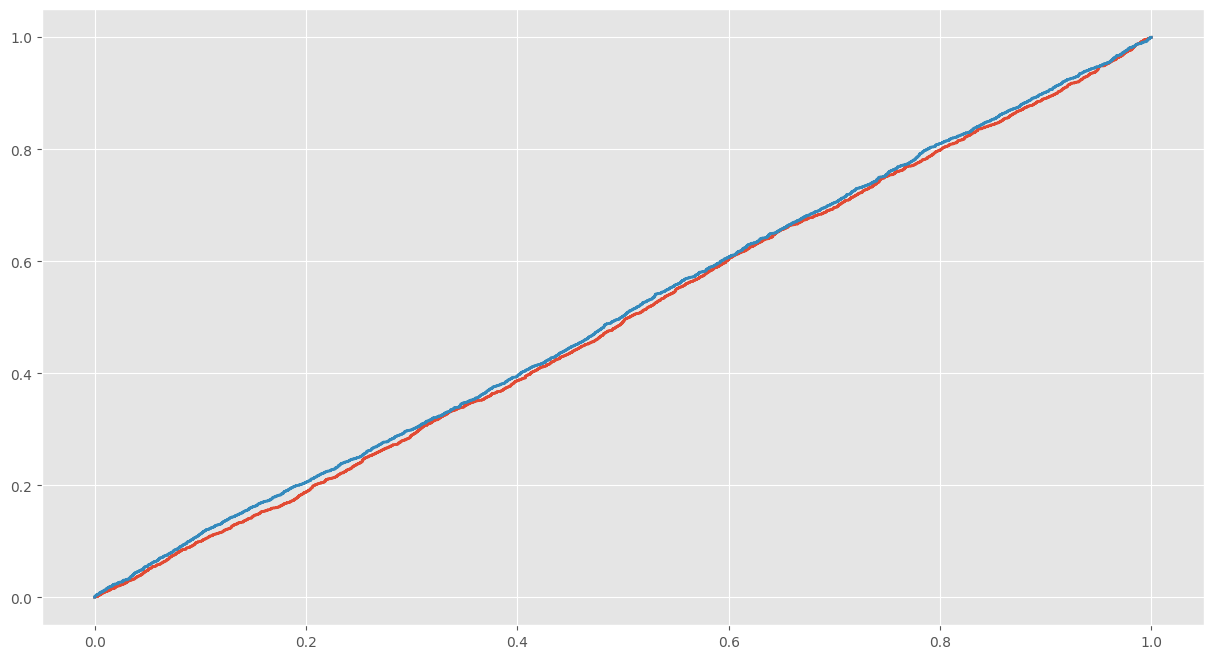

In [ ]:
# ROC_AUC bar plot of all models
def roc_auc_plot(y_true, y_proba, label=' ', l='-', lw=1.0):
    from sklearn.metrics import roc_curve, roc_auc_score
    fpr, tpr, _ = roc_curve(y_true, y_proba[:,1])
    ax.plot(fpr, tpr, linestyle=l, linewidth=2,
            label="%s (area=%.3f)"%(label,roc_auc_score(y_true, y_proba[:,1])))
f, ax = plt.subplots(figsize=(15,8))


roc_auc_plot(y_test,lr_model.predict_proba(x_test),label='Logistic Regression ',l='-')
roc_auc_plot(y_test,xgb_model.predict_proba(x_test),label='XGboost',l='-')
roc_auc_plot(y_test,svm_model.predict_proba(x_test),label='Support Vector Classifier ',l='-')
roc_auc_plot(y_test,nb_model.predict_proba(x_test),label='Random Forest Classifier ',l='-')
roc_auc_plot(y_test,NN_model.predict_proba(x_test),label='Neural Network ',l='-')

ax.plot([0,1], [0,1], color='k', linewidth=1, linestyle='--',
        )
ax.legend(loc="lower right")
ax.set_xlabel('False Positive Rate')
ax.set_ylabel('True Positive Rate')
ax.set_xlim([0, 1])
ax.set_ylim([0, 1])
ax.set_title('ROC AUC CURVES')
sns.despine()

## **Train Data Report**

In [ ]:
cm = sns.light_palette("xkcd:copper", as_cmap=True)
train_report.style.background_gradient(cmap=cm).set_precision(2)

In [ ]:
# ROC_AUC bar plot of all models
def roc_auc_plot(y_true, y_proba, label=' ', l='-', lw=1.0):
    from sklearn.metrics import roc_curve, roc_auc_score
    fpr, tpr, _ = roc_curve(y_true, y_proba[:,1])
    ax.plot(fpr, tpr, linestyle=l, linewidth=2,
            label="%s (area=%.3f)"%(label,roc_auc_score(y_true, y_proba[:,1])))


f, ax = plt.subplots(figsize=(15,8))

roc_auc_plot(y_test,lr_model.predict_proba(x_test),label='Logistic Regression ',l='-')
roc_auc_plot(y_test,xgb_model.predict_proba(x_test),label='XGboost',l='-')
roc_auc_plot(y_test,svm_model.predict_proba(x_test),label='Support Vector Classifier ',l='-')
roc_auc_plot(y_test,nb_model.predict_proba(x_test),label='Random Forest Classifier ',l='-')
roc_auc_plot(y_test,NN_model.predict_proba(x_test),label='Neural Network ',l='-')


ax.plot([0,1], [0,1], color='k', linewidth=1, linestyle='--',
        )
ax.legend(loc="lower right")
ax.set_xlabel('False Positive Rate')
ax.set_ylabel('True Positive Rate')
ax.set_xlim([0, 1])
ax.set_ylim([0, 1])
ax.set_title('ROC AUC CURVES')
sns.despine()

# **SUMMARY AND CONCLUSION**

## **Machine learning Results**

***The Best Model for live data is NEURAL NETWORK which shows maximum precision on test data***

Other results and summary are as follows:

*  I trained 5 Models which are Neural Network, Random Forest Classifier, Support Vector Classifier, XGboost and Logistic Regression.
* All performed similar but the fastest trainable is Neural Network and it takes less time to process output with test data acuraccy of 0.5006.
* Neural network gives precision of 0.51 on class 1 which is ('Churn='yes') and f1-score of 0.50.
* We recommend the use of Neural Network in real world data processing as it gave the best optimal performance in less time.

## **Challenges faced**

  * Feature engineering.
  * Creating New features
  * Fine tuning the models
  * Choosing model explainability techniques.
  * Running the slow Gradient Boosting Classifier.